In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [5]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


***

### No of unique in each columns

In [7]:
for i in list(df.columns):
    print("Unique Values in column {0} is {1} ".format(i,df[i].nunique()))
    print()

Unique Values in column ID is 5000 

Unique Values in column Age is 45 

Unique Values in column Experience is 47 

Unique Values in column Income is 162 

Unique Values in column ZIP Code is 467 

Unique Values in column Family is 4 

Unique Values in column CCAvg is 108 

Unique Values in column Education is 3 

Unique Values in column Mortgage is 347 

Unique Values in column Personal Loan is 2 

Unique Values in column Securities Account is 2 

Unique Values in column CD Account is 2 

Unique Values in column Online is 2 

Unique Values in column CreditCard is 2 



### Inference:

##### - There are 13 independent variable and 1 dependent variable.  
##### - Numeric Variables: ID, Age, Experience, Income, ZIP, CCAvg, Mortgage
##### - Cat. Variables: Family, Education
##### - Boolean Variables: Personal Loan	Securities Account	CD Account	Online	CreditCard

***

In [8]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [9]:
df.shape

(5000, 14)

### Checking for null

In [10]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Inference

##### No null values in the dataset
##### Experience has -ve values (min)
##### Mortgage has a standard deviation of 101.7
****

##### Changing the column names for ease of useage

In [11]:
df.columns = df.columns.str.replace(" ","_")

In [12]:
df.head()

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

***

#### Preliminary check: Correlation HeatMap

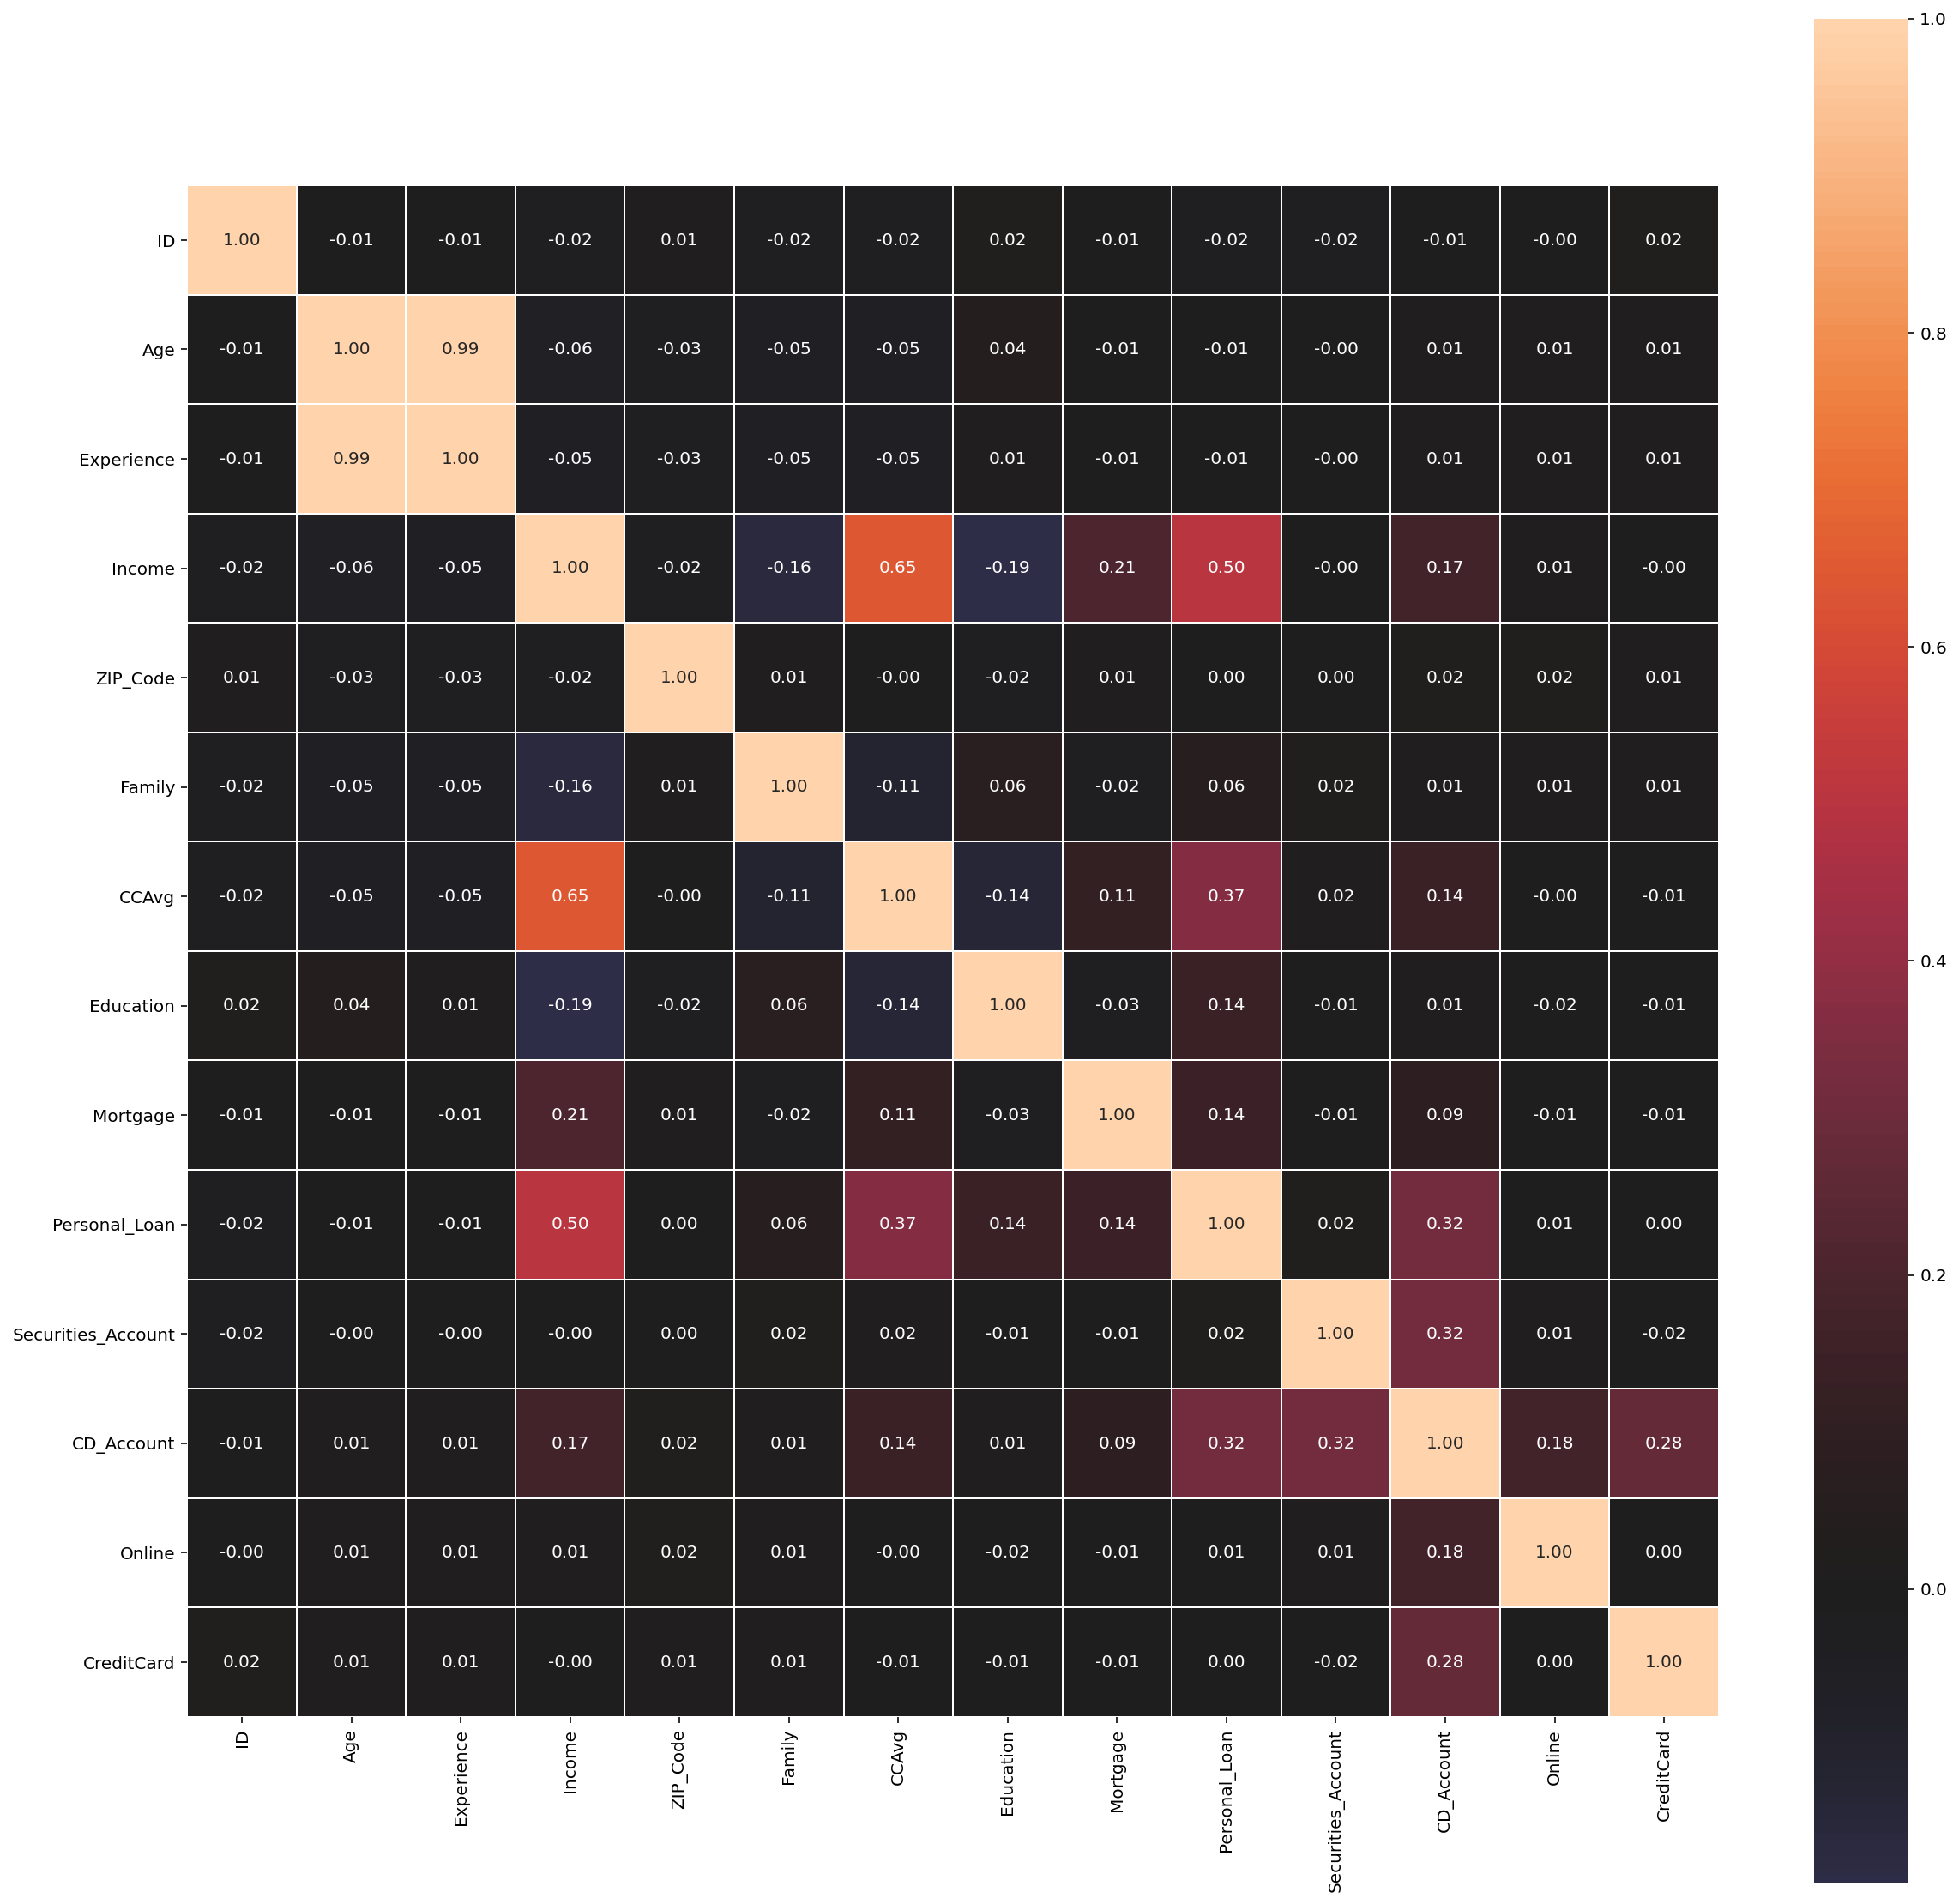

In [13]:
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), square=True, annot=True, fmt=".2f", linewidth=0.5, center=0 )

### Inference:

##### Age and Experience are highly correlated

***

### Value counts of all columns

In [14]:
for col in list(df.columns):
    print("Value Counts of",col)
    print(df[col].value_counts())
    print()

Value Counts of ID
2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

Value Counts of Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Value Counts of Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11

***

### Verifying Age

In [15]:
df.Age.shape

(5000,)

In [16]:
df.Age.unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

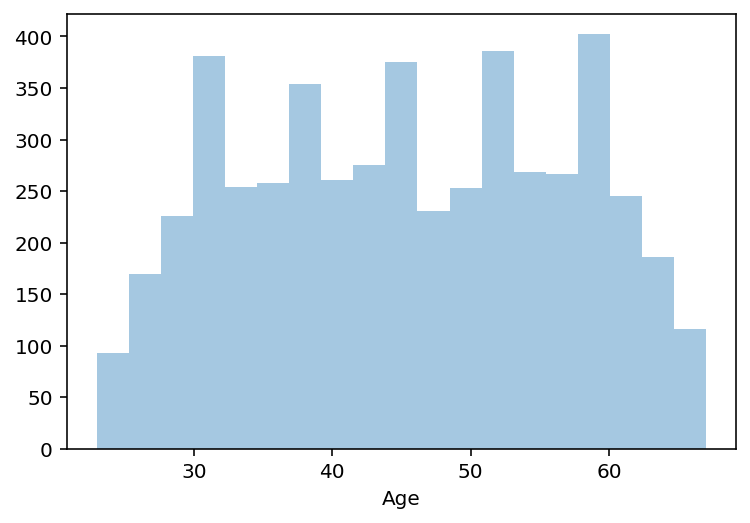

In [17]:
sns.distplot(df.Age, kde=False)

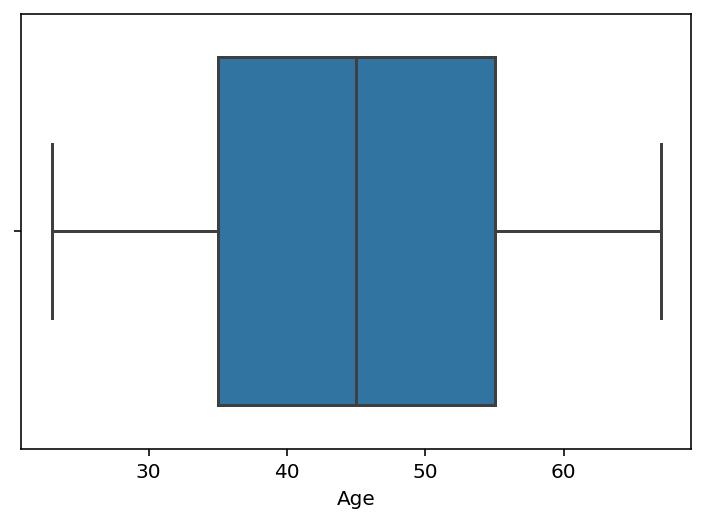

In [18]:
sns.boxplot(df.Age)

In [19]:
df.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [20]:
df.Age.skew()

-0.02934068151284029

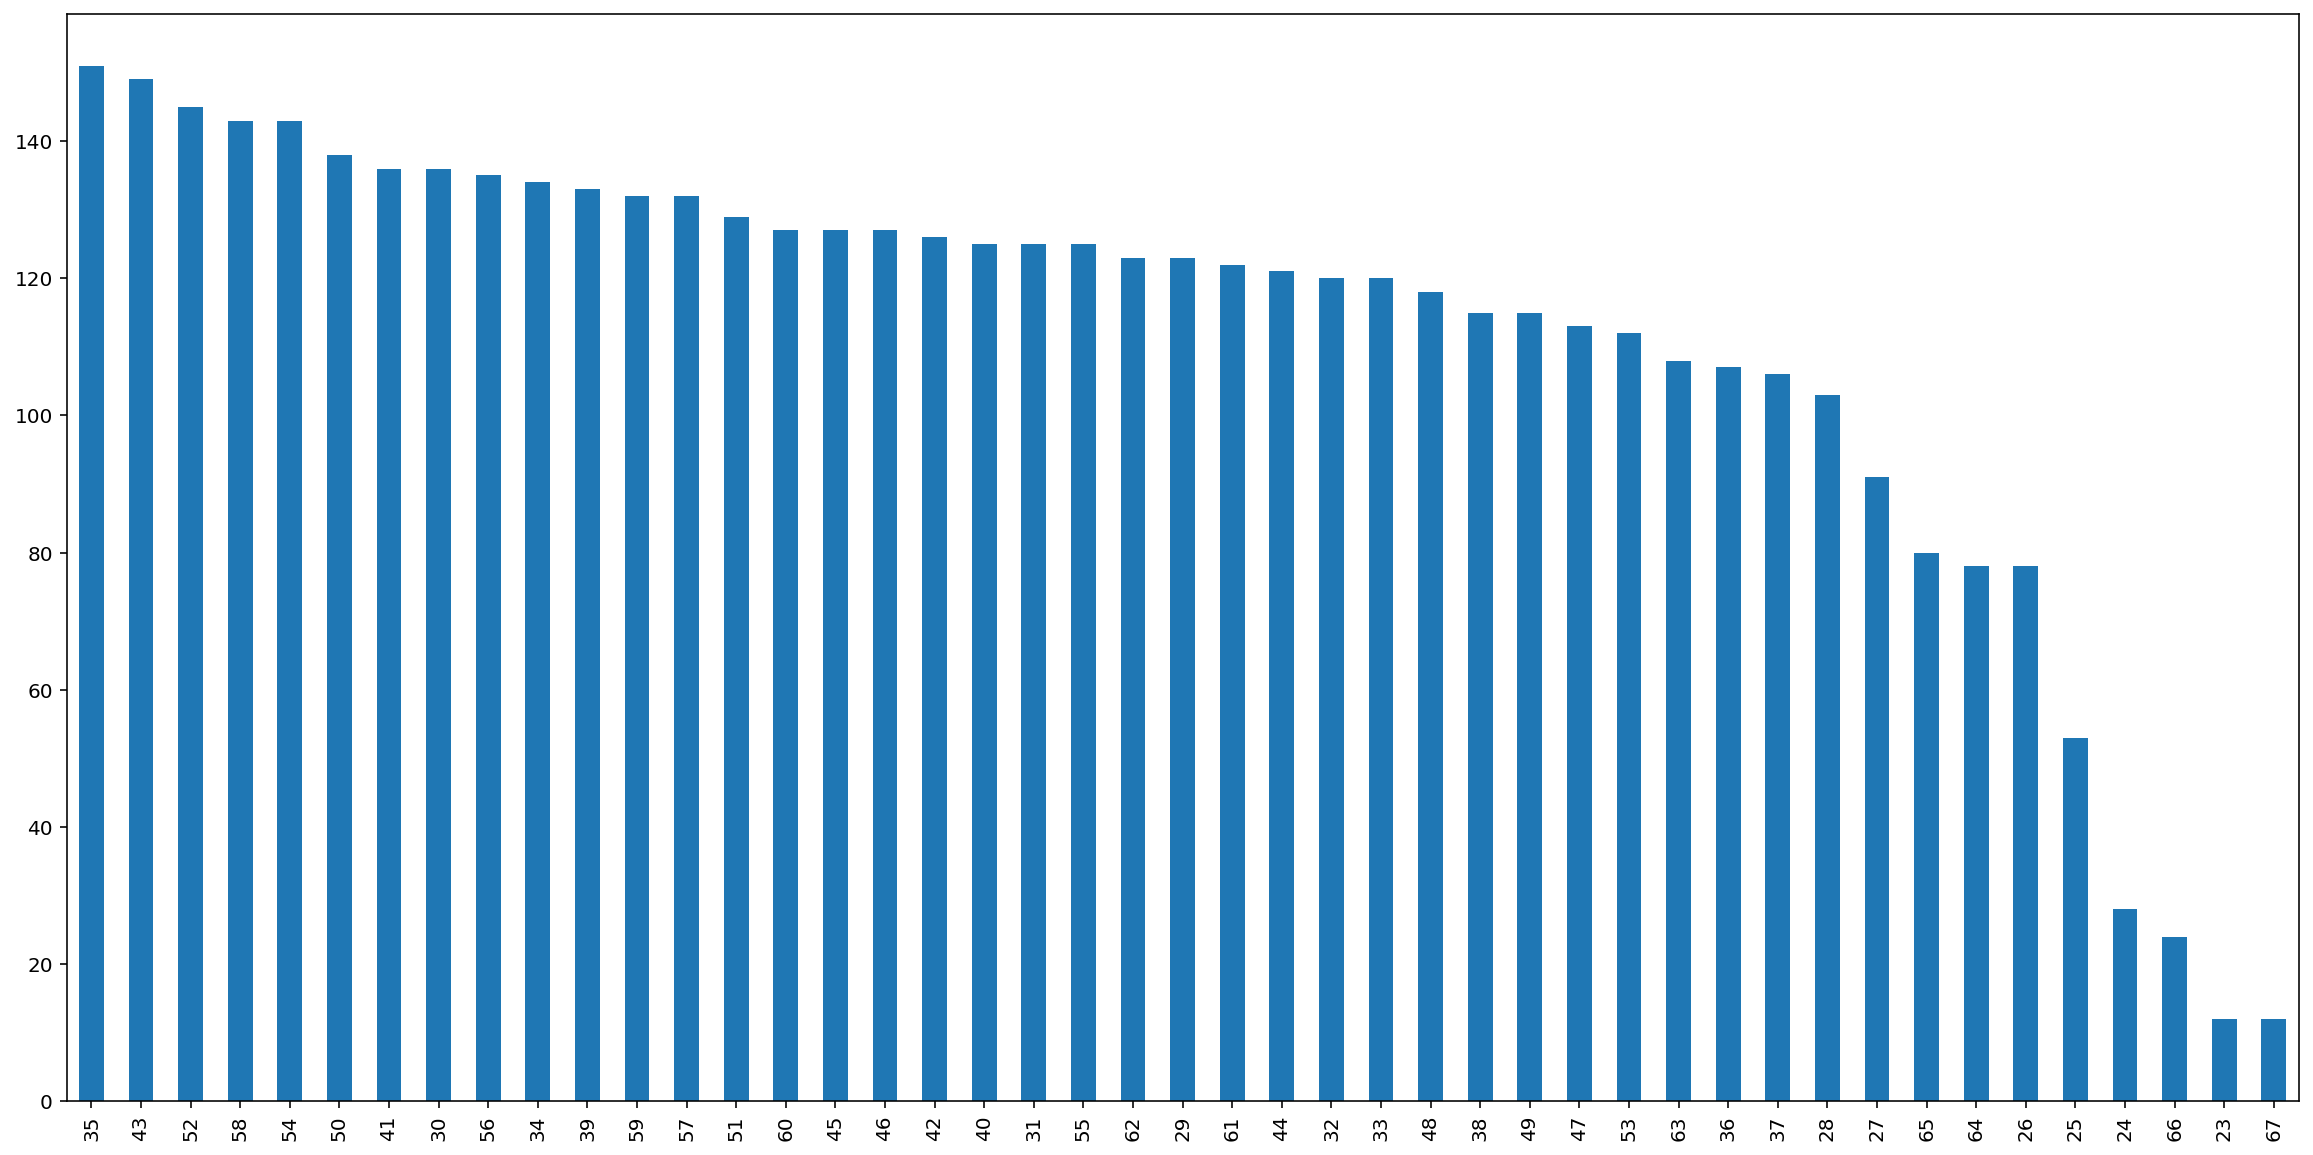

In [21]:
plt.figure(figsize=(20,10))
df.Age.value_counts(dropna=False).plot.bar()

### Inference

#### Age is approximately Normally Distributed
#### No outliers

***

### Verify Experience

In [22]:
df.Experience.shape

(5000,)

In [23]:
df.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

##### There are negative values in Experience which is not right. Replacing all the negative values to NaN

In [24]:
df.loc[(df.Experience<0),"Experience"] = np.nan

In [25]:
df.Experience.unique()

array([ 1., 19., 15.,  9.,  8., 13., 27., 24., 10., 39.,  5., 23., 32.,
       41., 30., 14., 18., 21., 28., 31., 11., 16., 20., 35.,  6., 25.,
        7., 12., 26., 37., 17.,  2., 36., 29.,  3., 22., nan, 34.,  0.,
       38., 40., 33.,  4., 42., 43.])

In [26]:
df.Experience.isna().sum()

52

In [27]:
df.Experience.skew()

-0.014939648543772385

##### Will impute the missing values now with "median" strategy (to avoid float with mean)

In [28]:
from sklearn.impute import SimpleImputer
rep_nan = SimpleImputer (missing_values=np.nan, strategy = "median")
imputer = rep_nan.fit(df[["Experience"]])

In [29]:
df["Experience"] = imputer.transform(df[["Experience"]])

In [30]:
df.Experience.unique()

array([ 1., 19., 15.,  9.,  8., 13., 27., 24., 10., 39.,  5., 23., 32.,
       41., 30., 14., 18., 21., 28., 31., 11., 16., 20., 35.,  6., 25.,
        7., 12., 26., 37., 17.,  2., 36., 29.,  3., 22., 34.,  0., 38.,
       40., 33.,  4., 42., 43.])

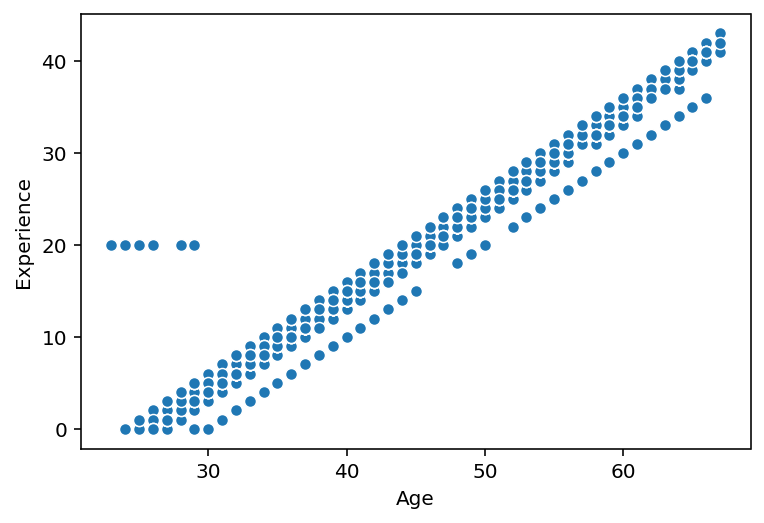

In [31]:
sns.scatterplot(df.Age,df.Experience)

In [32]:
## Note: Perhaps a Multivariate Imputer can be used to determine better values for NaN in Experience based on "Age" since they are highly correlated.

In [33]:
df["Experience"] = df["Experience"].astype("int64")

In [34]:
df.Experience.skew()

-0.01409975101962344

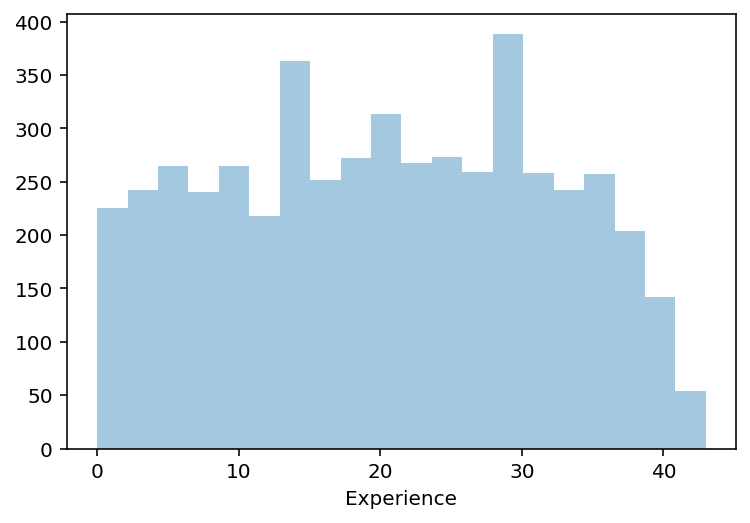

In [35]:
sns.distplot(df.Experience, kde=False)

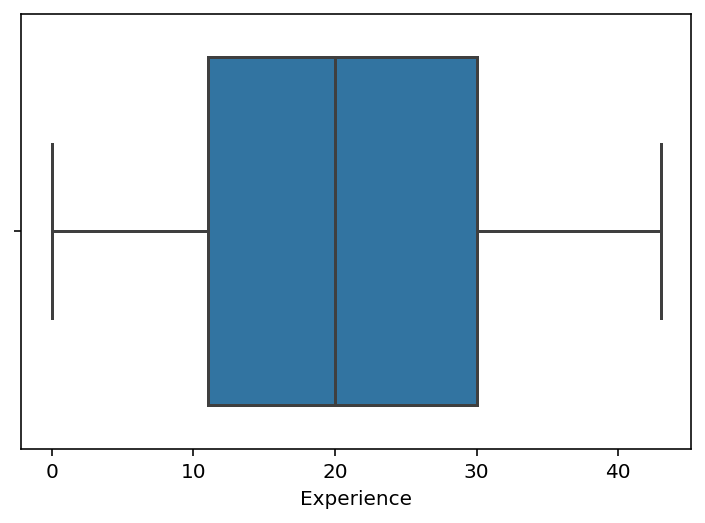

In [36]:
sns.boxplot(df.Experience)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


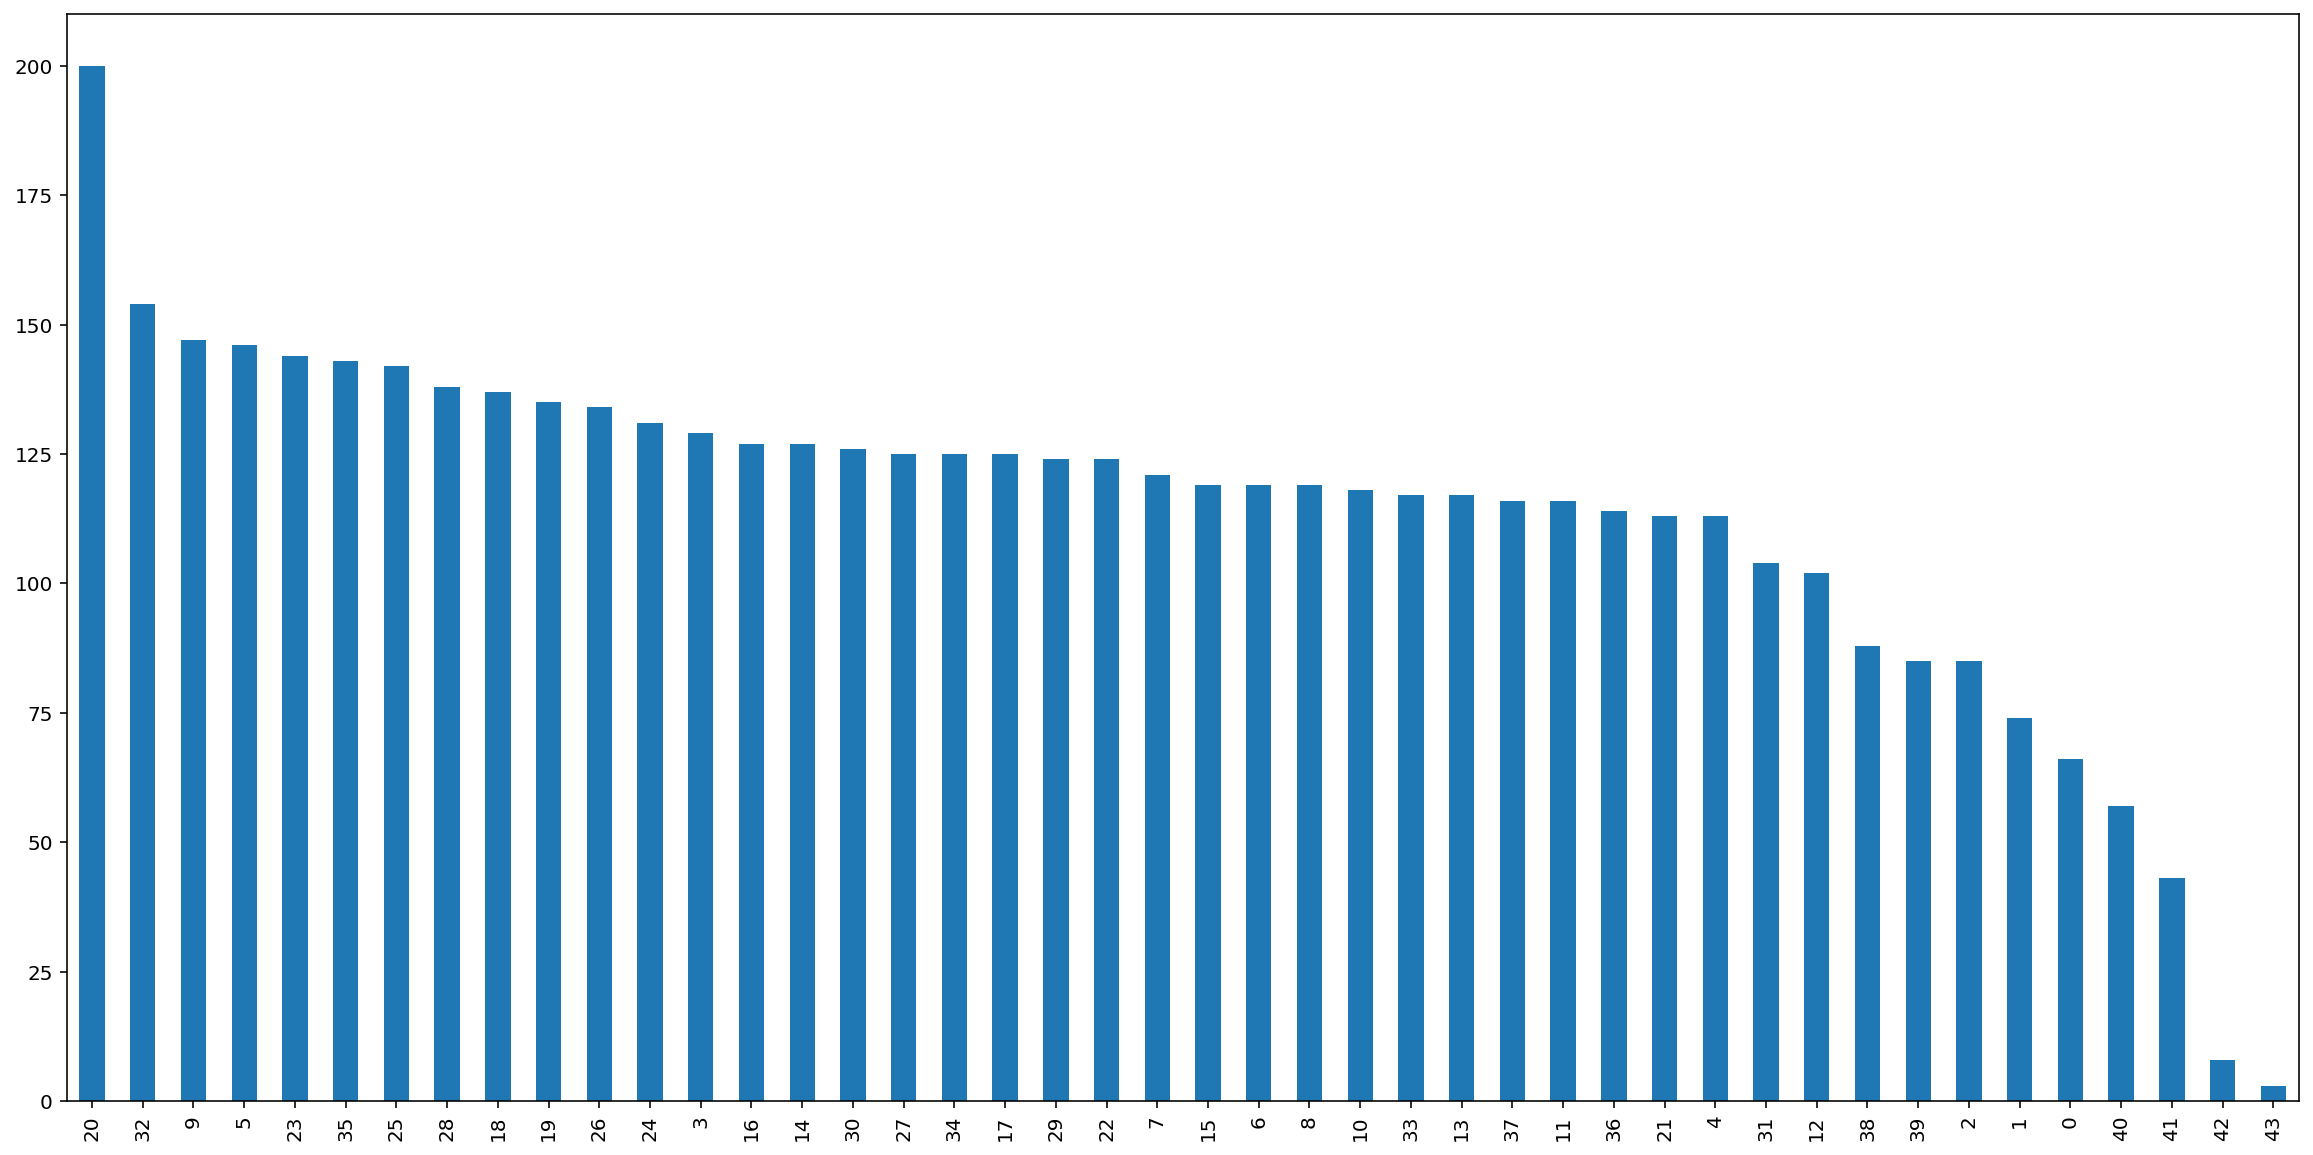

In [38]:
plt.figure(figsize=(20,10))
df.Experience.value_counts(dropna=False).plot.bar()

### Inference

#### Experience is approximately Normally Distributed
#### No outliers
#### Missing values imputed
***

### Verify Income

In [39]:
df.Income.shape

(5000,)

In [40]:
df.Income.unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

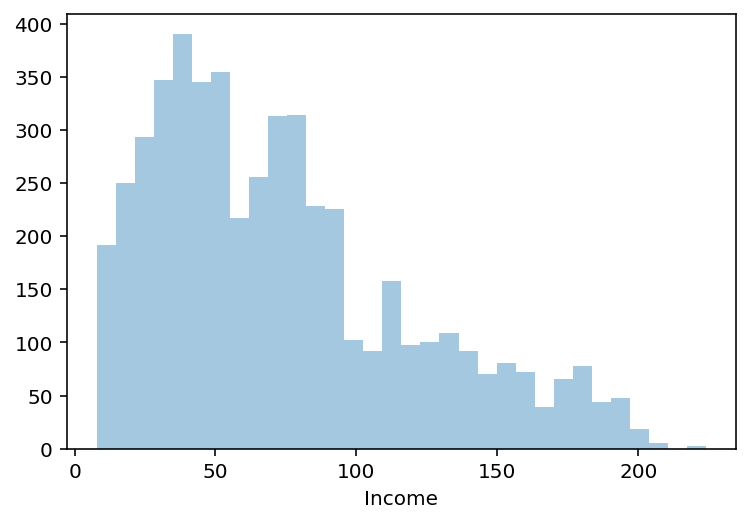

In [41]:
sns.distplot(df.Income, kde=False)

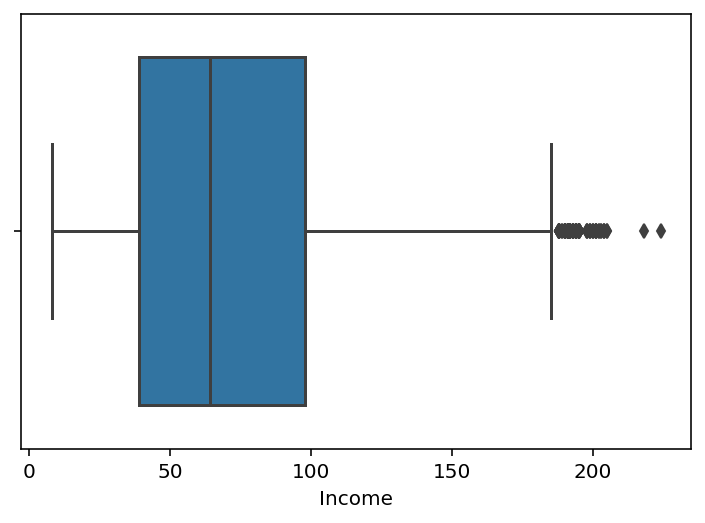

In [42]:
sns.boxplot(df.Income)

In [43]:
df.Income.describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [44]:
df.Income.skew()

0.8413386072610816

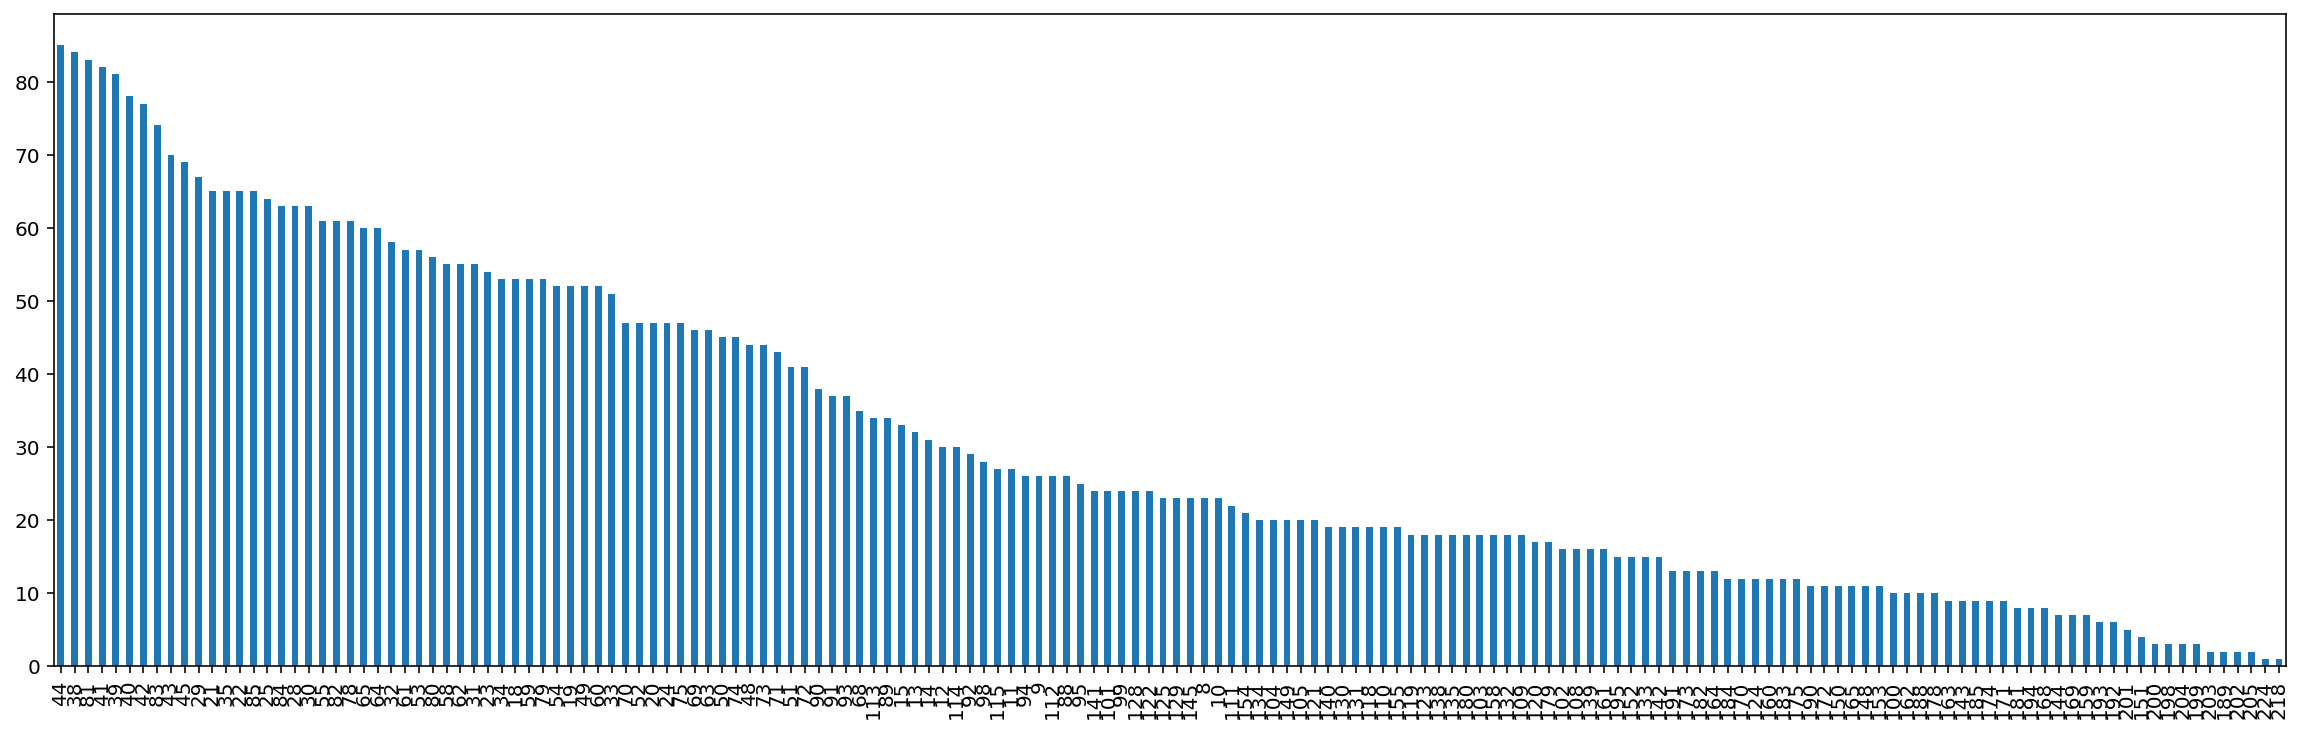

In [45]:
plt.figure(figsize=(20,6))
df.Income.value_counts(dropna=False).plot.bar()

### Inference:

#### Income is sightly skewed...
***

### Verify CCAvg

In [46]:
df.shape

(5000, 14)

In [47]:
df.CCAvg.shape

(5000,)

In [48]:
df.CCAvg.unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

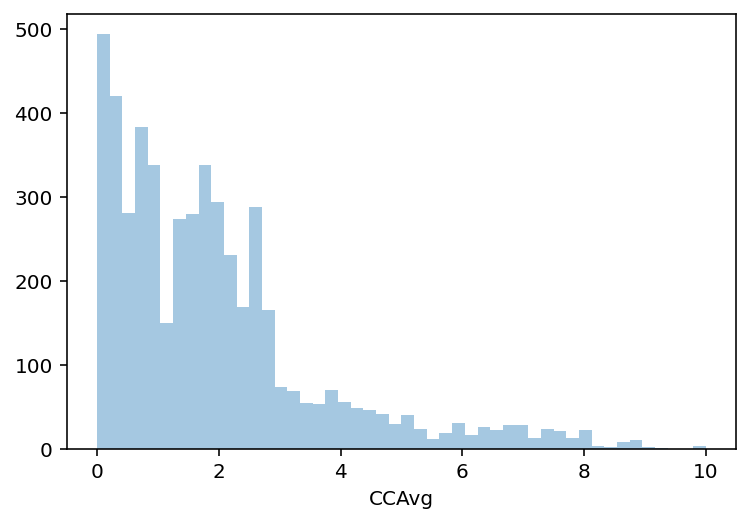

In [49]:
sns.distplot(df.CCAvg, kde=False)

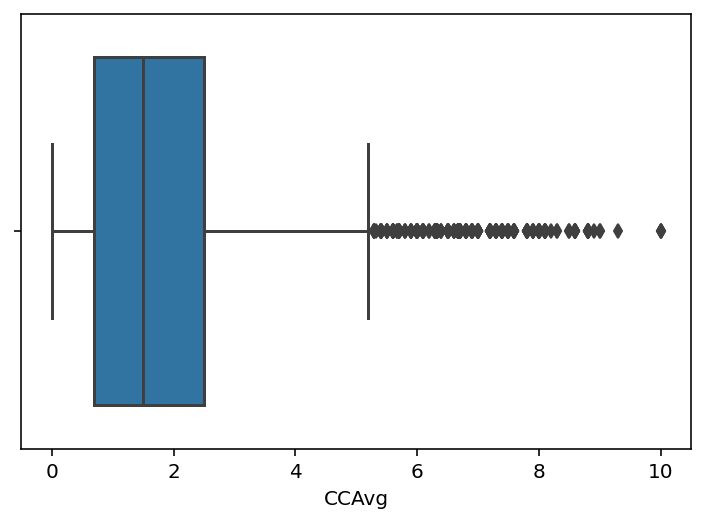

In [50]:
sns.boxplot(df.CCAvg)

In [51]:
df.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [52]:
df.CCAvg.skew()

1.5984433366678663

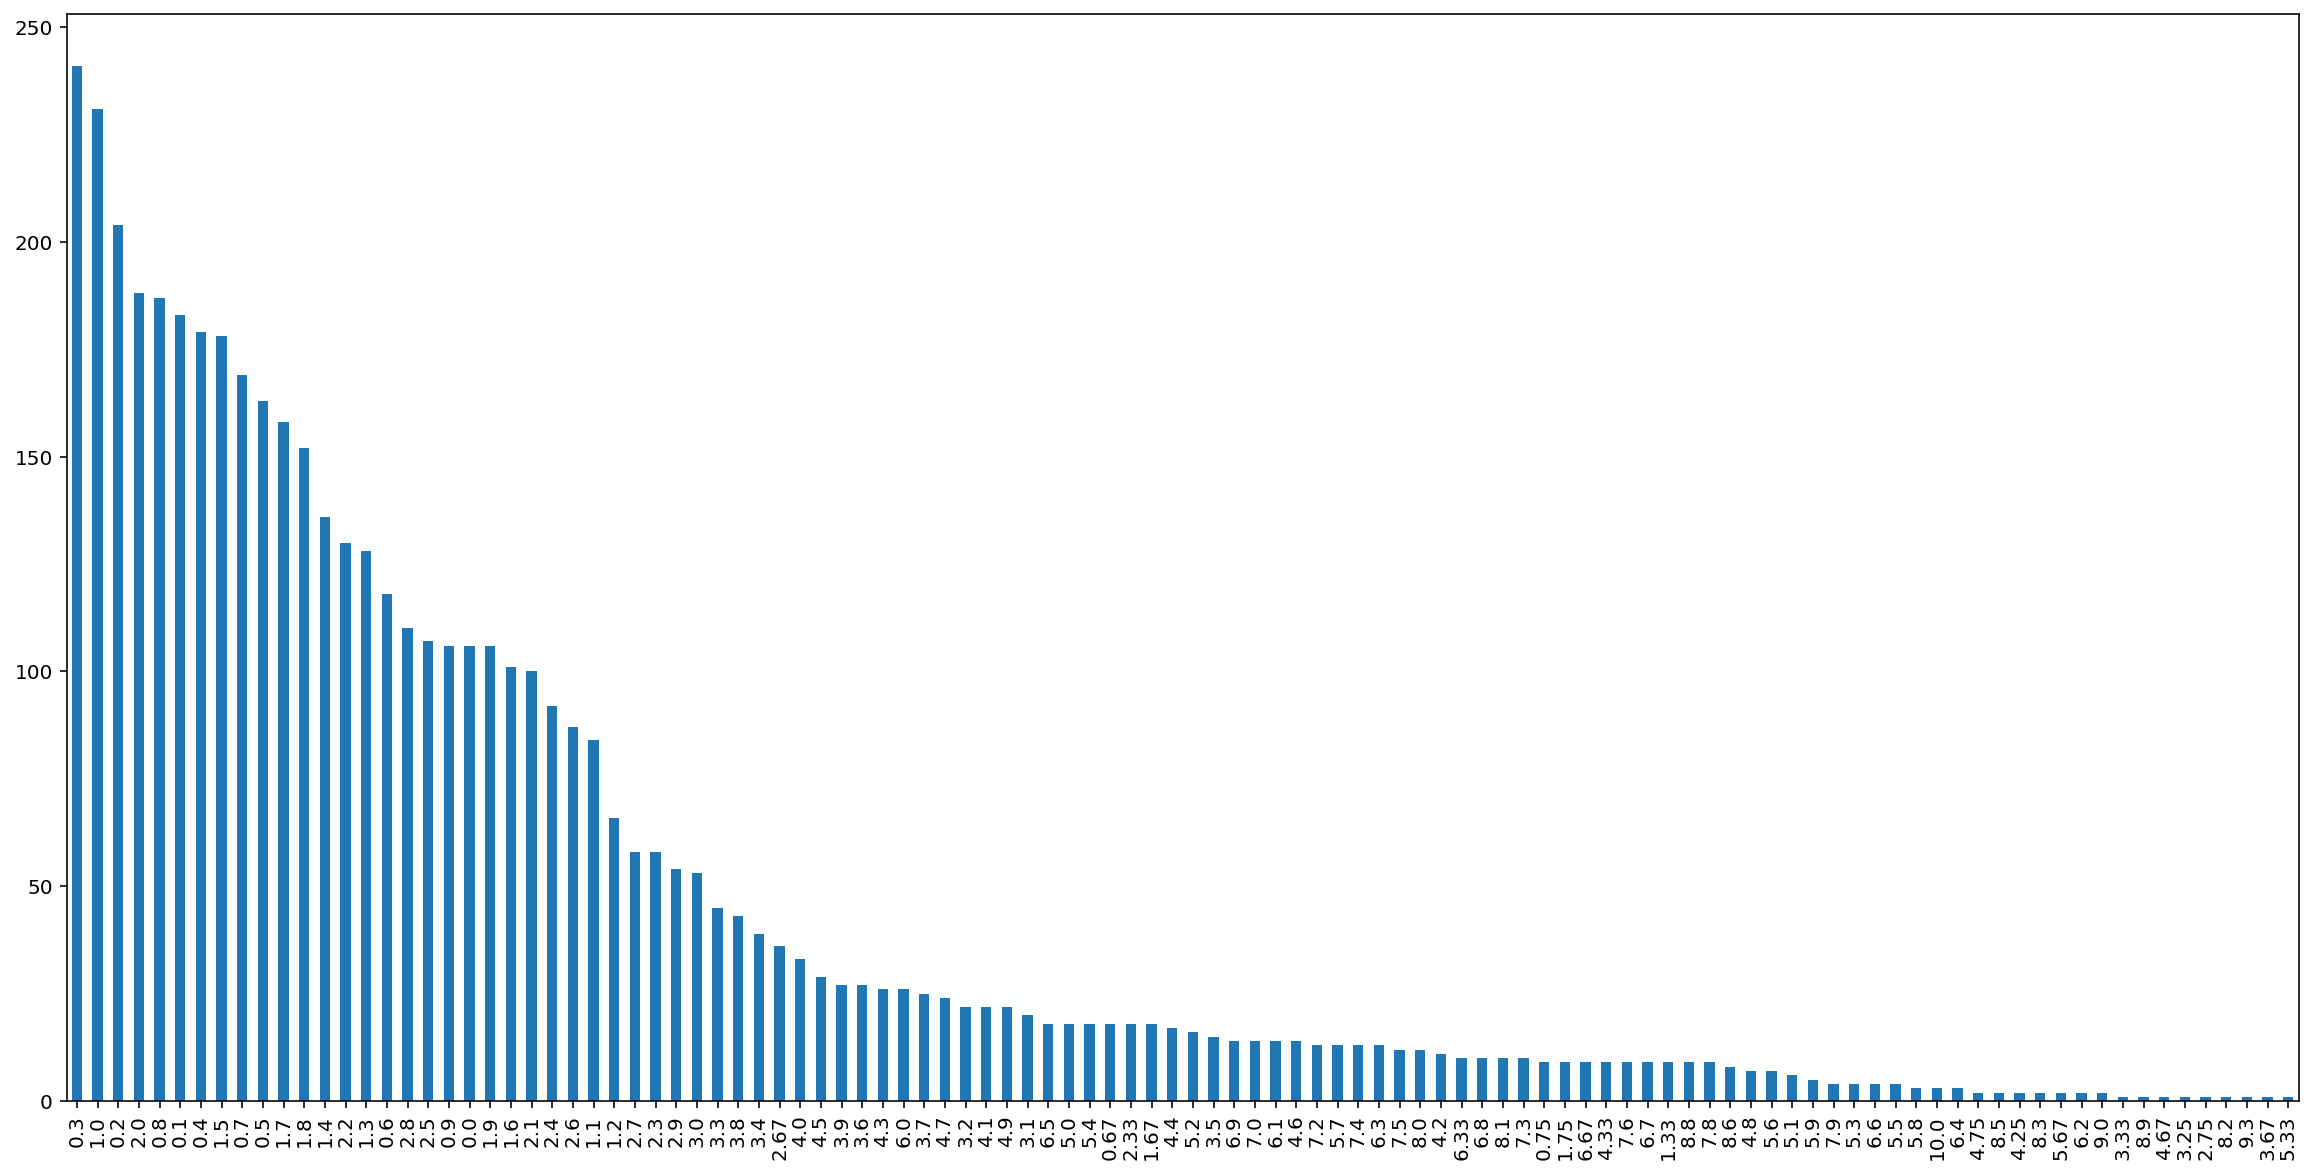

In [53]:
plt.figure(figsize=(20,10))
df.CCAvg.value_counts(dropna=False).plot.bar()

### Inference

##### CCAvg Data is highly skewed - Need to check if performing a StandardScalar works
***

### No of people with Zero Credit Card spending per month

In [54]:
df.CCAvg.loc[df.CCAvg==0].count()

106

### Inference

##### There are 106 entries that have Zero average spending per month on credit cards
***

### Verify Mortgage

In [55]:
df.Mortgage.shape

(5000,)

In [56]:
df.Mortgage.unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

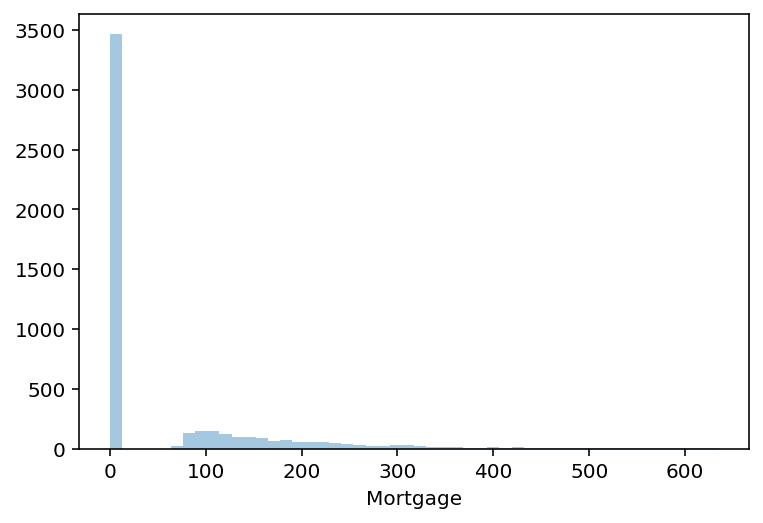

In [57]:
sns.distplot(df.Mortgage, kde=False)

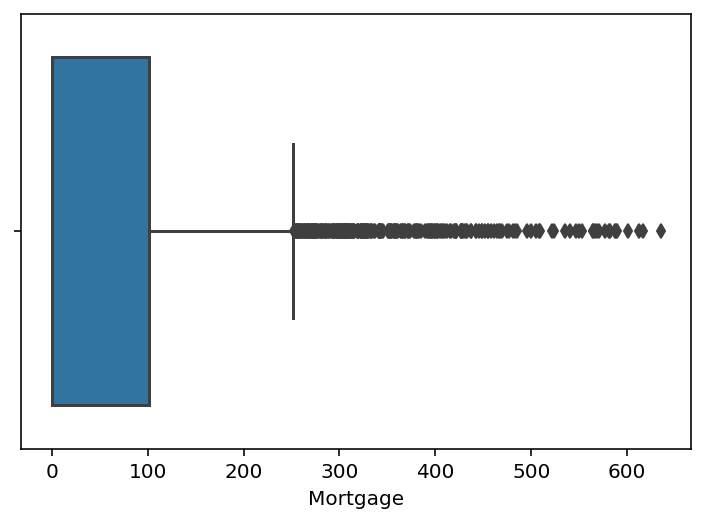

In [58]:
sns.boxplot(df.Mortgage)

In [59]:
df.Mortgage.describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [60]:
df.Mortgage.skew() # too much skewness....

2.1040023191079444

In [61]:
plt.figure(figsize=(20,10))
df.Mortgage.value_counts(dropna=False)

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

<Figure size 1440x720 with 0 Axes>

In [62]:
len(df[df.Mortgage==0])/len(df.Mortgage)*100

69.24

### Inference

##### Almost 70% of mortgage entries are Zero
##### The coulmn is highly skewed
##### There are too many outliers
***

In [63]:
df.head()

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Verify Education

In [64]:
df.Education.unique()

array([1, 2, 3], dtype=int64)

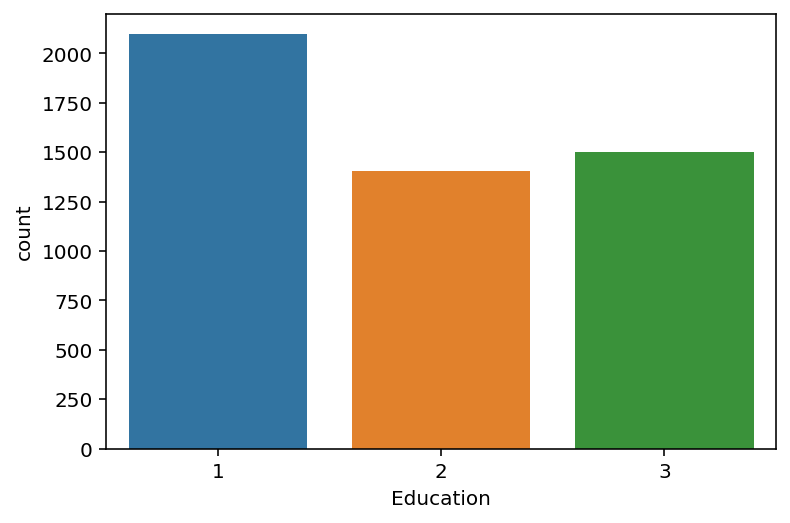

In [65]:
sns.countplot(df.Education)

In [66]:
df.Education.value_counts(normalize=True)*100

1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64

### Inference

##### 40% of the population are undergraduates
***

### Verify Family

In [67]:
df.Family.unique()

array([4, 3, 1, 2], dtype=int64)

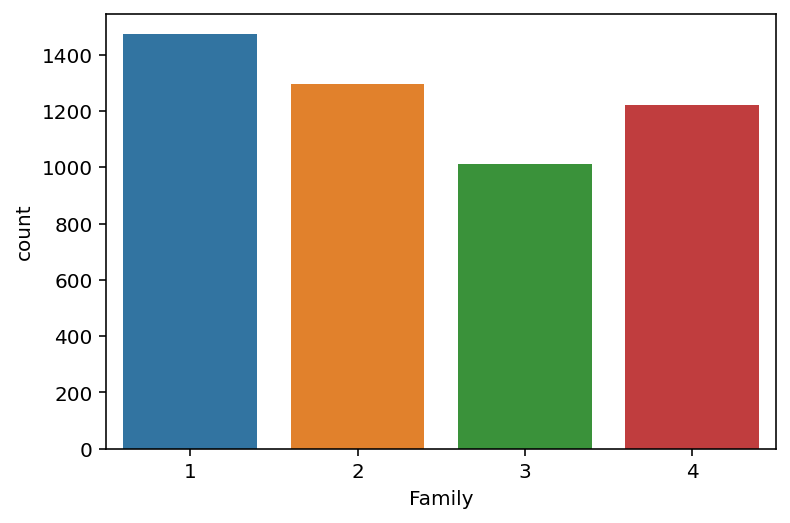

In [68]:
sns.countplot(df.Family)

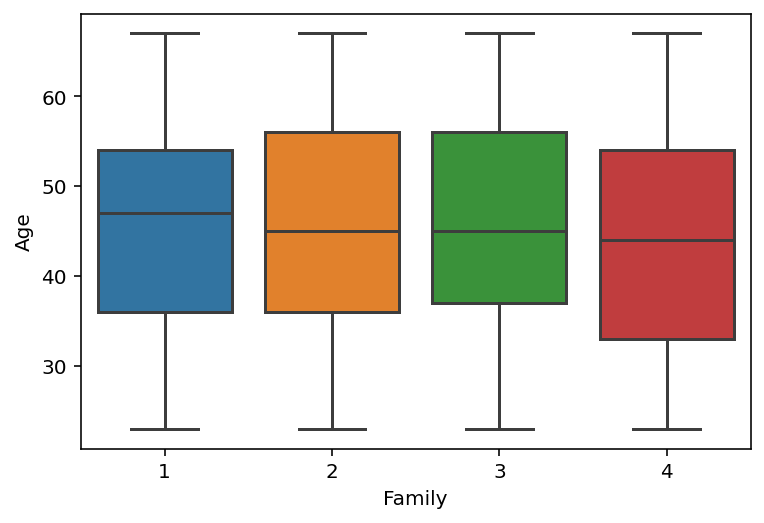

In [69]:
sns.boxplot(df.Family,df.Age)

In [70]:
df.Family.value_counts(normalize=True)*100

1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64

### Inference

##### The percentage distribution of Family is approximately equally distributed.
##### The spread of age within is also norally distributed.
***

### Verify CreditCard

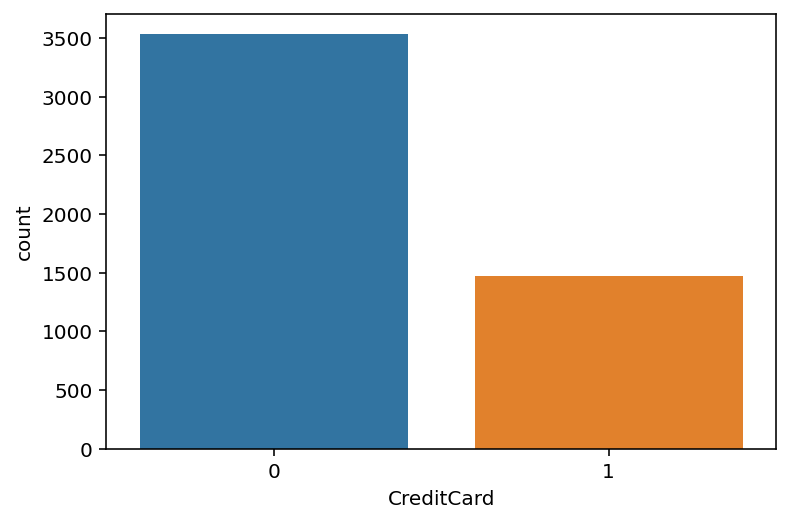

In [71]:
sns.countplot(df.CreditCard)

In [72]:
df.CreditCard.value_counts(normalize=True)*100

0    70.6
1    29.4
Name: CreditCard, dtype: float64

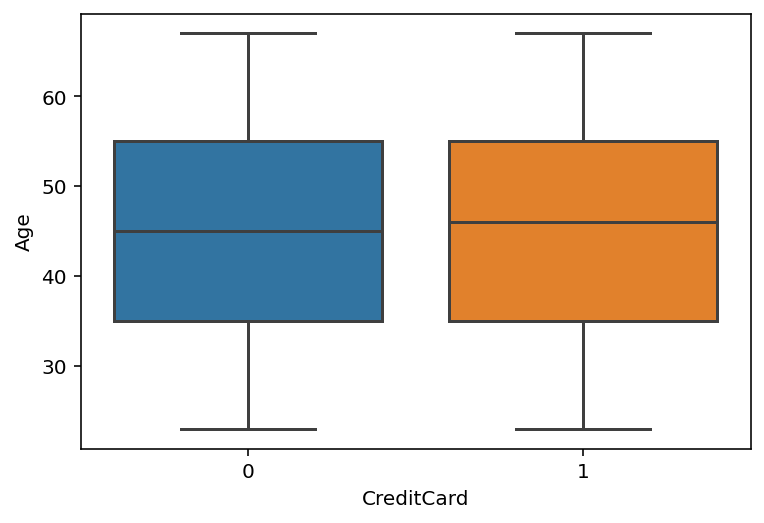

In [73]:
sns.boxplot(df.CreditCard, df.Age)

### Inference

##### Clearly 70.6% do not own a credit card
##### There is no age bias in owning or not owning a credit card
***

### Verify CD_Account

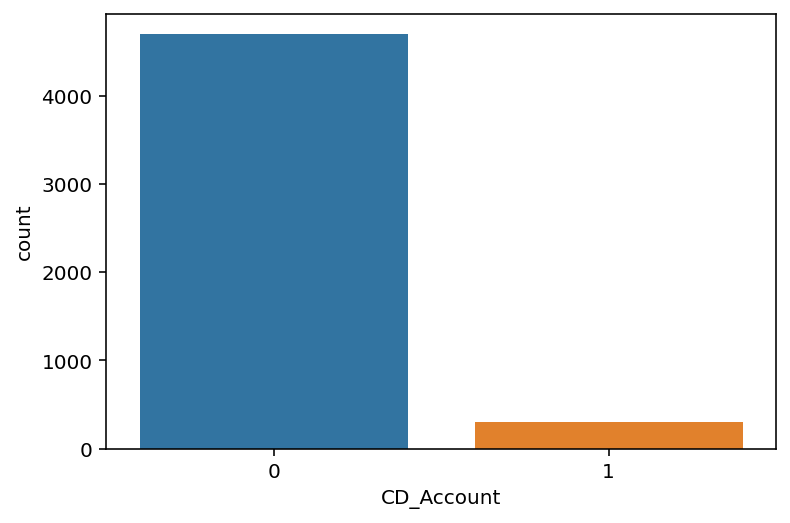

In [74]:
sns.countplot(df.CD_Account)

In [75]:
df.CD_Account.value_counts(normalize=True)*100

0    93.96
1     6.04
Name: CD_Account, dtype: float64

### Inference

##### 93.96% of those who applied for personal loan do not have a Deposit of Credit Account
***

### Verify Online

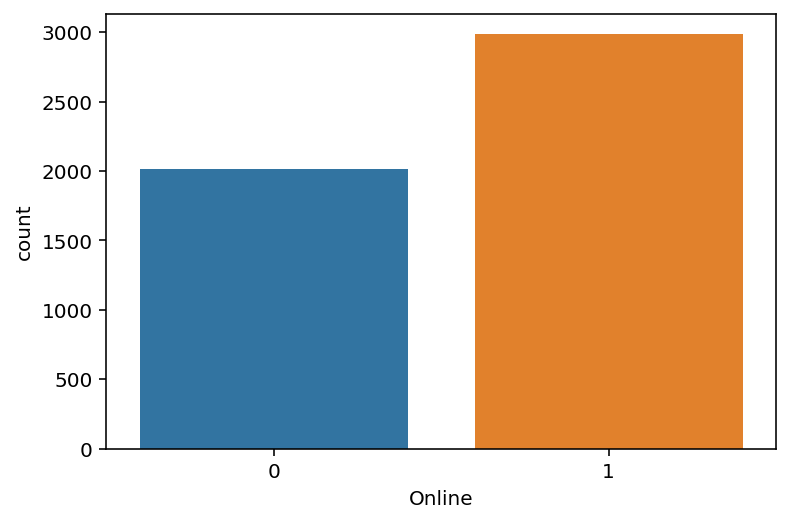

In [76]:
sns.countplot(df.Online)

In [77]:
df.Online.value_counts(normalize=True)*100

1    59.68
0    40.32
Name: Online, dtype: float64

### Inference

##### 59.68% of those who applied for Loan were active in Online banking...

#### Verify Securities_Account

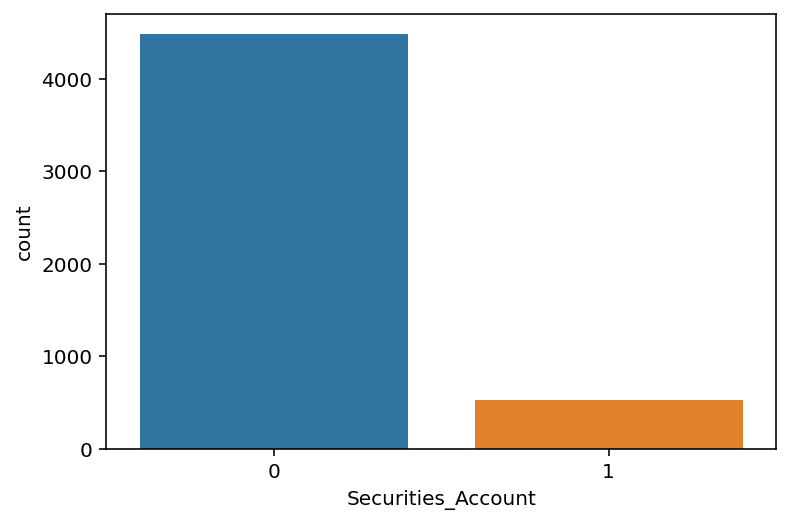

In [78]:
sns.countplot(df.Securities_Account)

In [79]:
df.Securities_Account.value_counts(normalize=True)*100

0    89.56
1    10.44
Name: Securities_Account, dtype: float64

### Inference

##### A vast majority of people who have Securities Account do not apply for Personal Loan
***

### Verify Personal_Loan

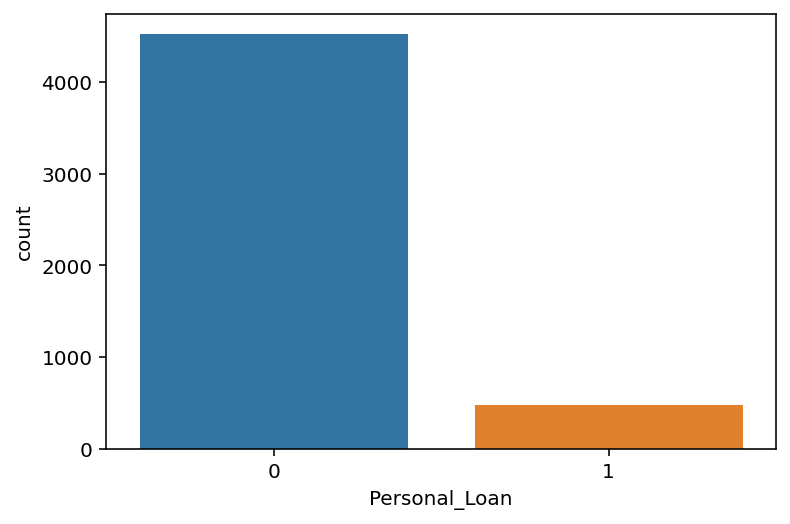

In [80]:
sns.countplot(df.Personal_Loan)

In [81]:
df.Personal_Loan.value_counts(normalize=True)*100

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64

### Inference

##### 90% of them did not apply for loan from the last campaign.
***

### Dropping ID and ZIP Column

The ID is just a number that does not influence the outcome hence can be dropped.

Similarly, The ZIP_Code is just a number that does not influence the outcome hence can be dropped.

In [82]:
df_copy = df.copy()

In [83]:
df = df.drop(["ID","ZIP_Code"], axis=1)

In [84]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [85]:
df.shape

(5000, 12)

***
## Perfoming bivariate analysis.

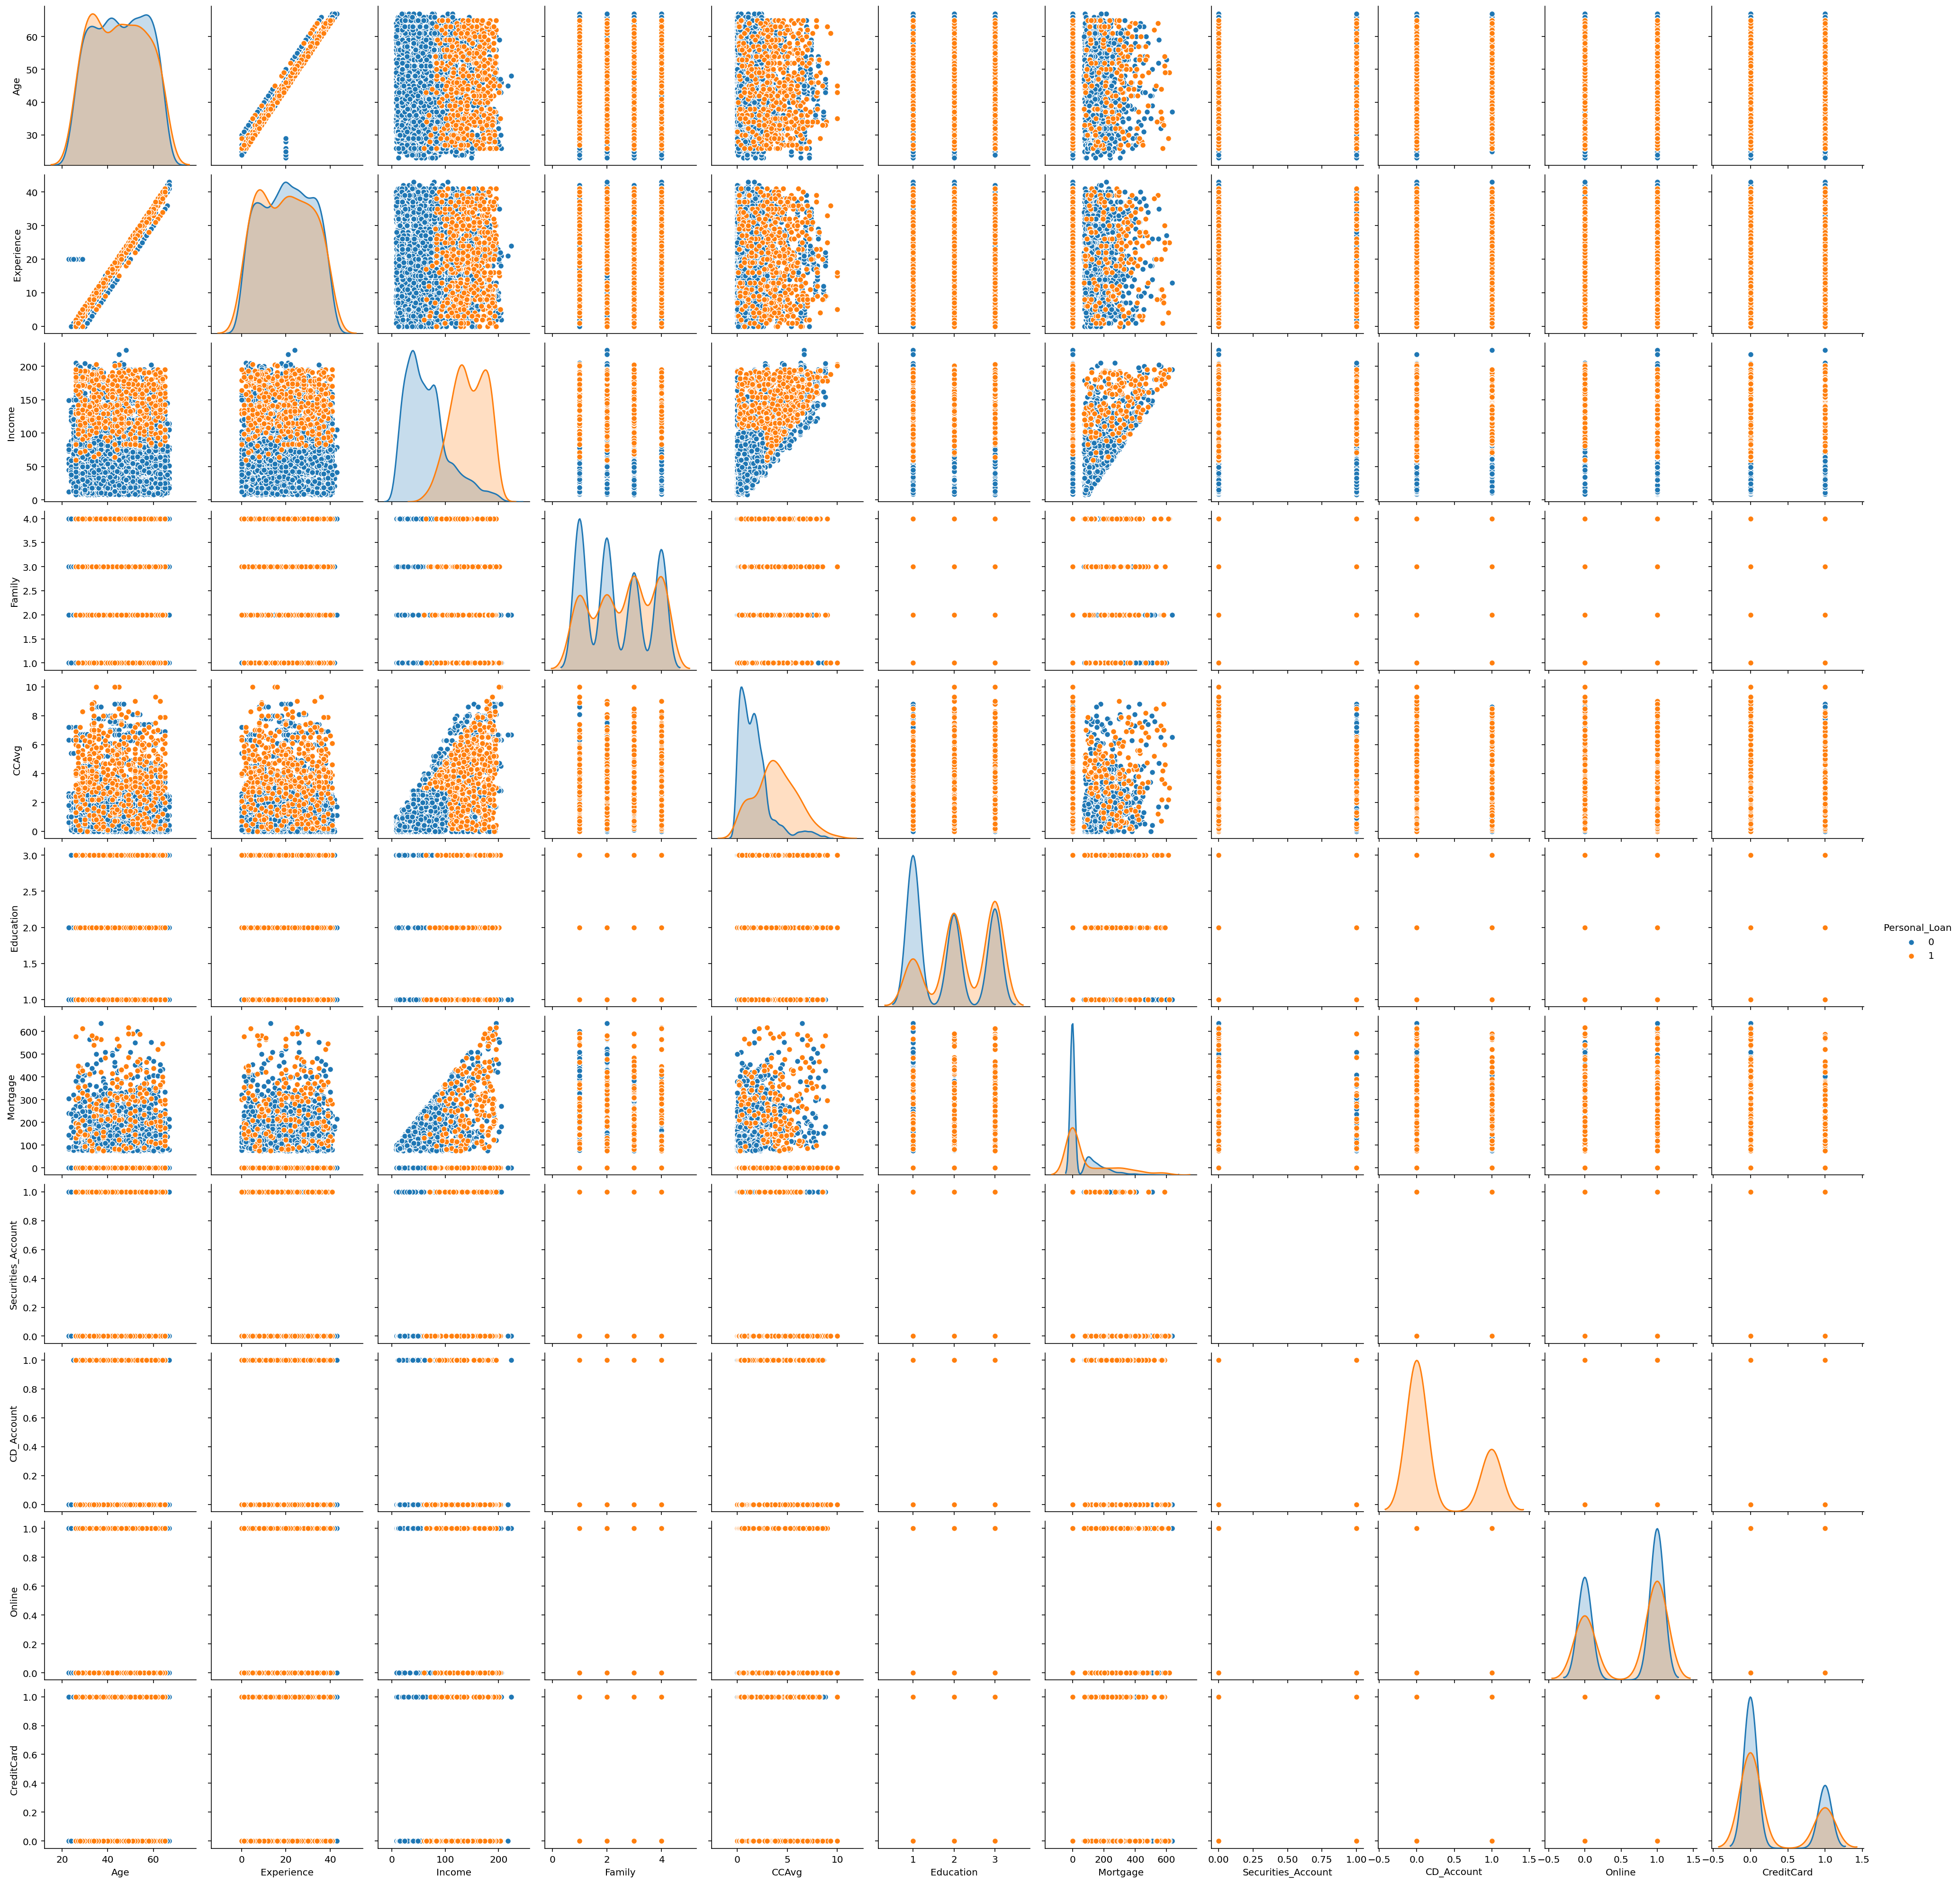

In [86]:
sns.pairplot(df, hue="Personal_Loan")

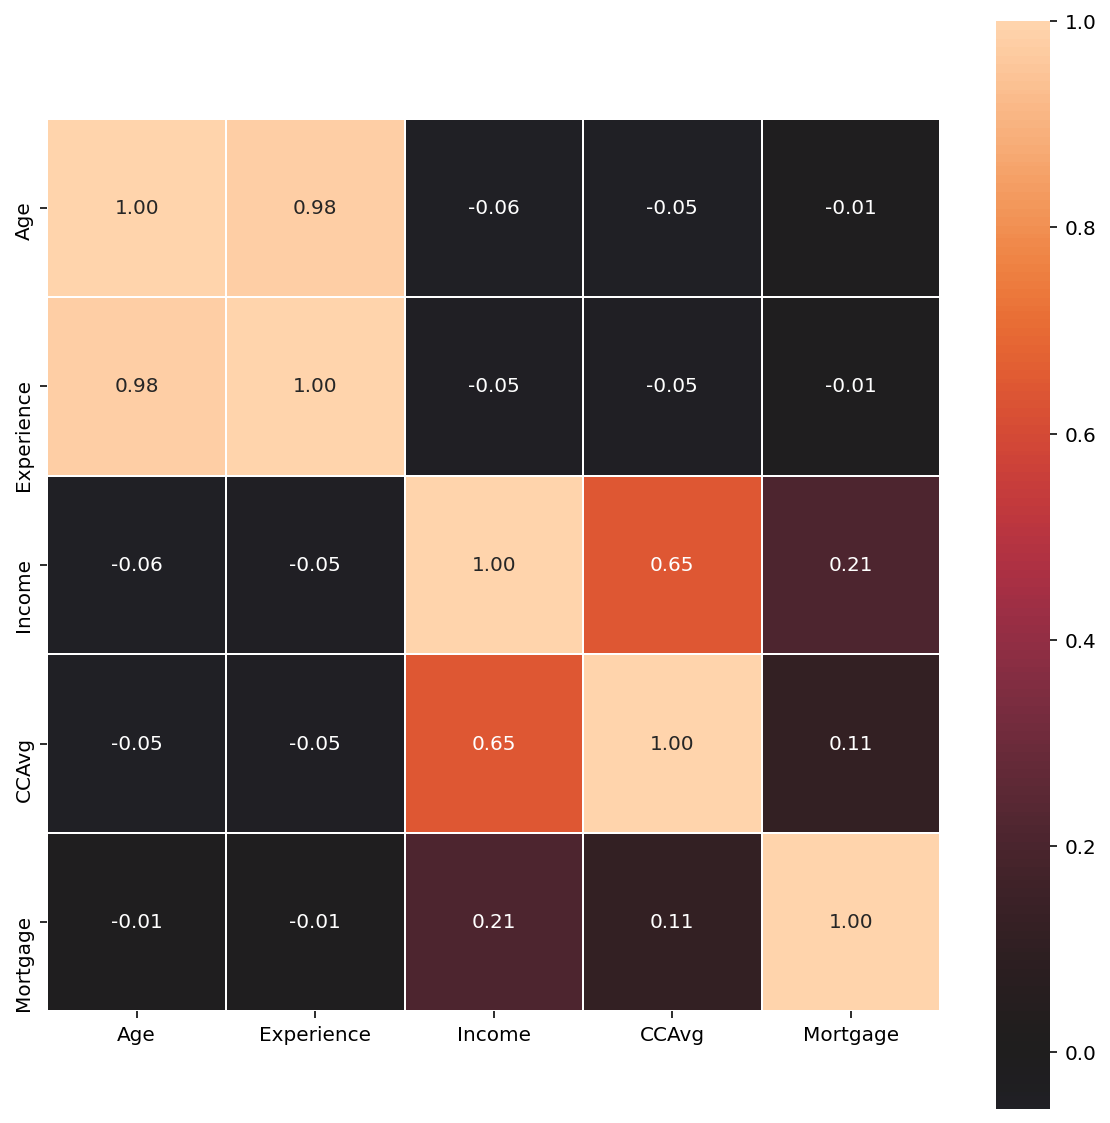

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(df[["Age","Experience","Income","CCAvg","Mortgage"]].corr(), square=True, annot=True, fmt=".2f", linewidth=0.5, center=0 )

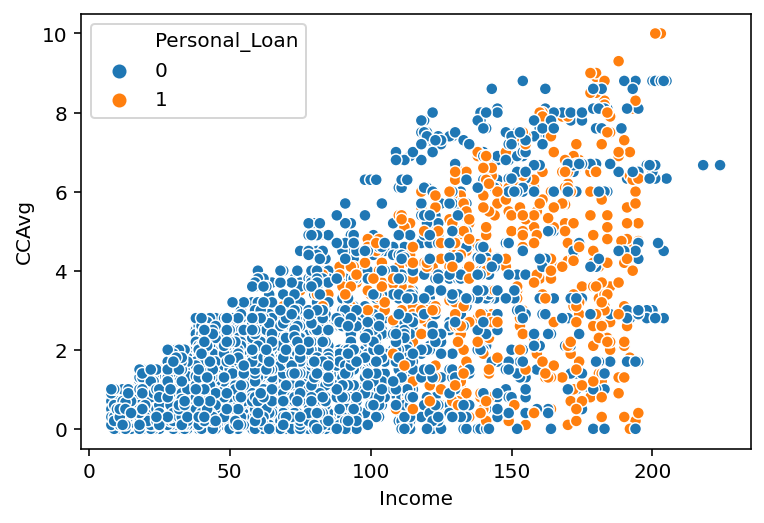

In [88]:
sns.scatterplot(data=df,x="Income",y="CCAvg",hue="Personal_Loan")

### Inference: 
##### Age and Experience are highly correlated
##### Income and Credit Card spending are poisitively coorelated.
##### Higher Income group likely apply for loan --> needs further verification
***

Text(0.5, 1.0, 'Percentage of Sum')

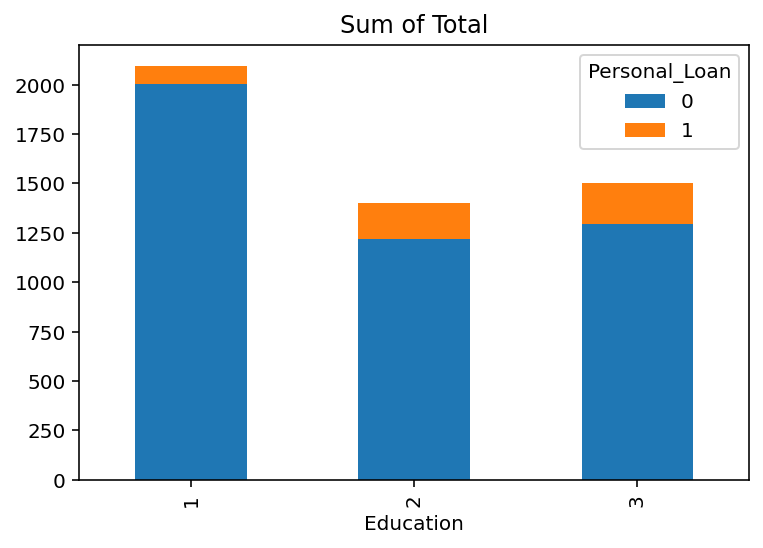

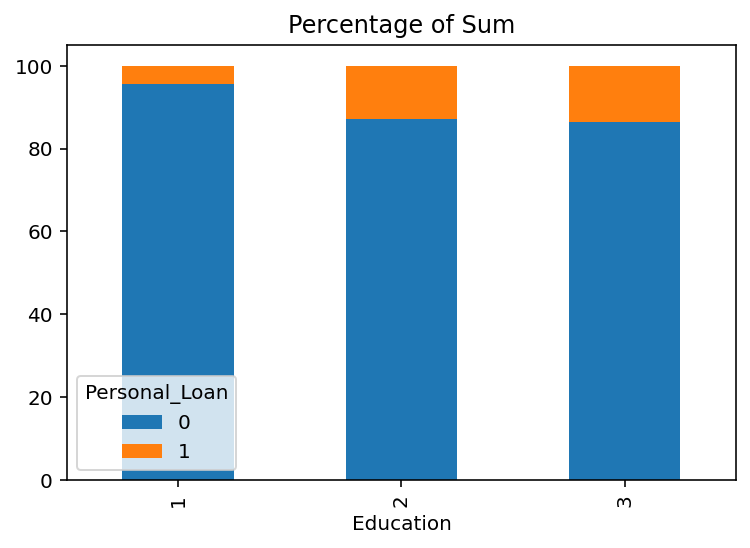

In [89]:
di=pd.crosstab(df.Education,df.Personal_Loan)
di1 = di.div(di.sum(1),axis=0)*100
di.plot(kind="bar",stacked=True)
plt.title("Sum of Total")
di1.plot(kind="bar",stacked=True)
plt.title("Percentage of Sum")

### Inference: More educated have a higher tendency to apply for loan.
***

Text(0.5, 1.0, 'Percentage of Sum')

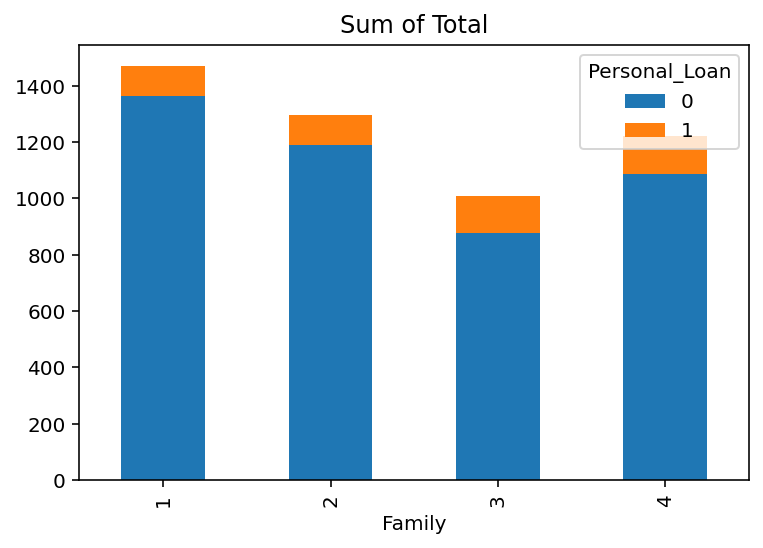

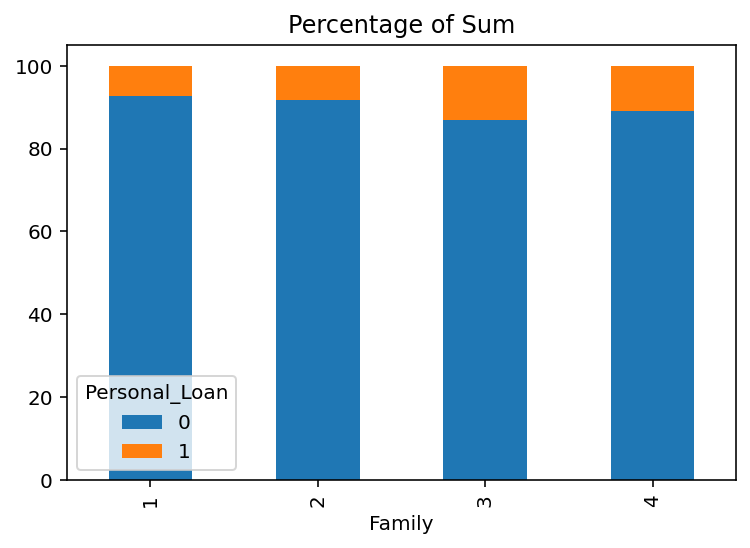

In [90]:
di=pd.crosstab(df.Family,df.Personal_Loan)
di1 = di.div(di.sum(1),axis=0)*100
di.plot(kind="bar",stacked=True)
plt.title("Sum of Total")
di1.plot(kind="bar",stacked=True)
plt.title("Percentage of Sum")

### Inference
##### Number of family members does not seem to be an important factor for applying Personal Loans
***

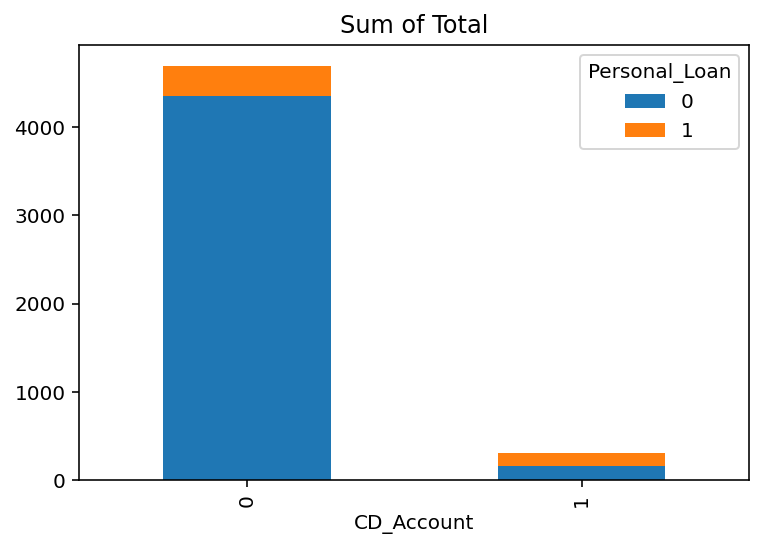

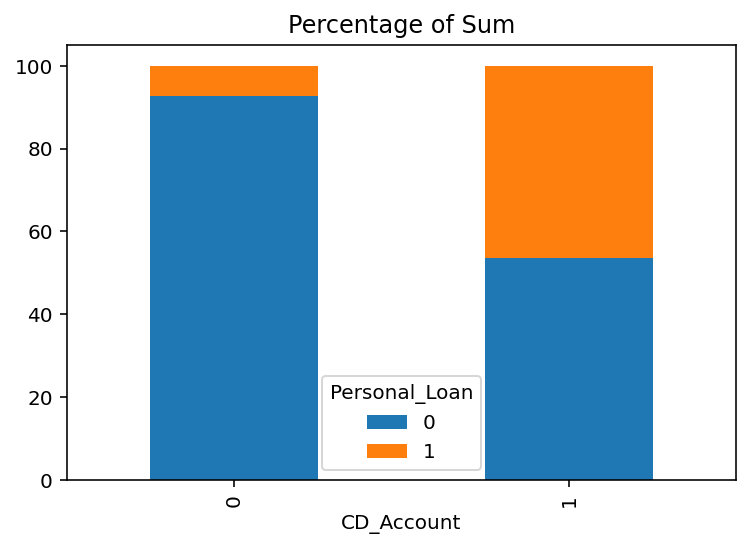

In [91]:
di=pd.crosstab(df.CD_Account,df.Personal_Loan)
di1 = di.div(di.sum(1),axis=0)*100
di.plot(kind="bar",stacked=True)
plt.title("Sum of Total")
di1.plot(kind="bar",stacked=True)
plt.title("Percentage of Sum")
plt.show()

### Inference

##### People with CD_Account have higher "chances" of appying for loan.
***

Text(0.5, 1.0, 'Percentage of Sum')

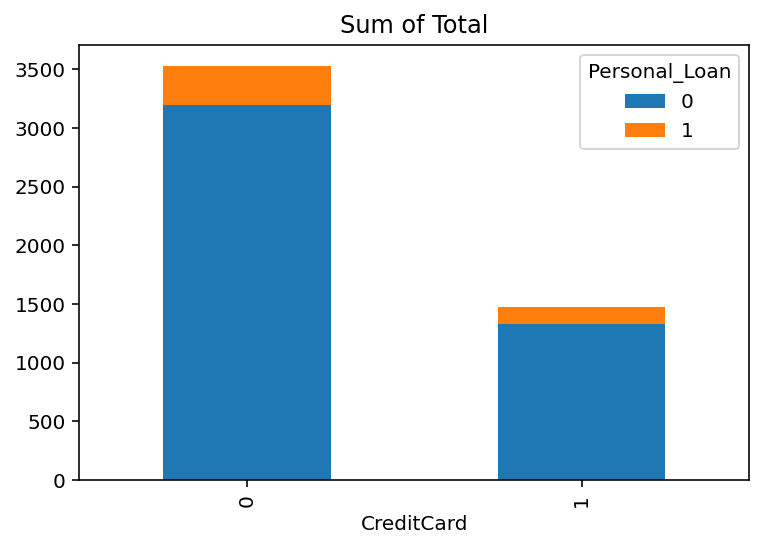

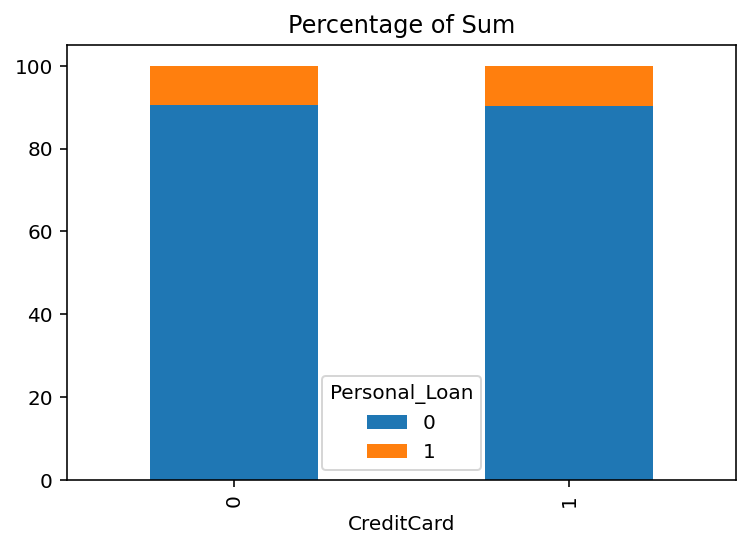

In [92]:
di=pd.crosstab(df.CreditCard,df.Personal_Loan)
di1 = di.div(di.sum(1),axis=0)*100
di.plot(kind="bar",stacked=True)
plt.title("Sum of Total")
di1.plot(kind="bar",stacked=True)
plt.title("Percentage of Sum")

### Inference

##### The probablility of applying for personal Loan is not influenced by Credit Cards
***

Text(0.5, 1.0, 'Percentage of Sum')

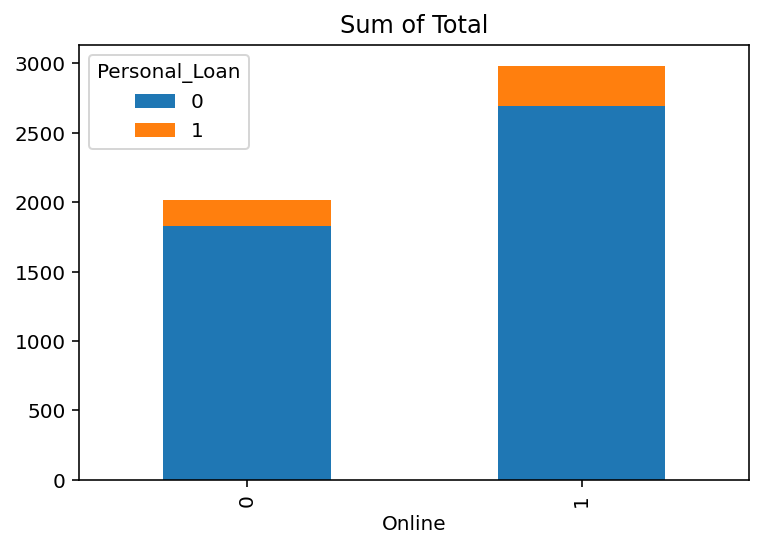

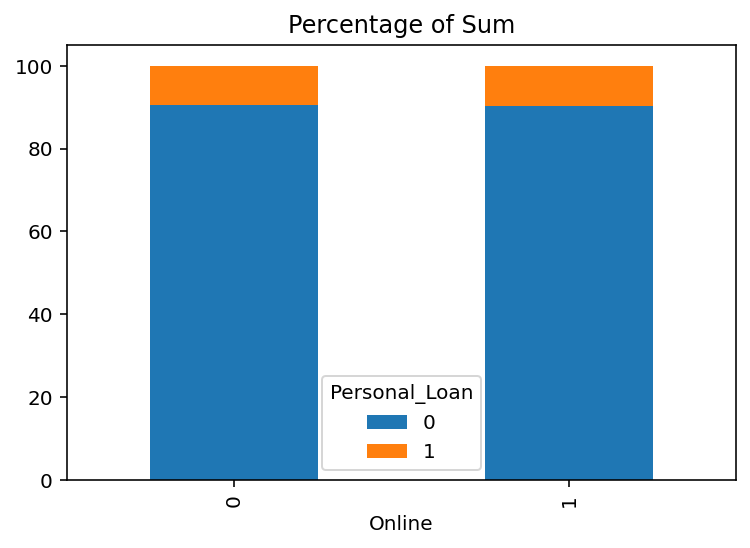

In [93]:
di=pd.crosstab(df.Online,df.Personal_Loan)
di1 = di.div(di.sum(1),axis=0)*100
di.plot(kind="bar",stacked=True)
plt.title("Sum of Total")
di1.plot(kind="bar",stacked=True)
plt.title("Percentage of Sum")

### Inference

##### Online banking is not a factor
***

Text(0.5, 1.0, 'Percentage of Sum')

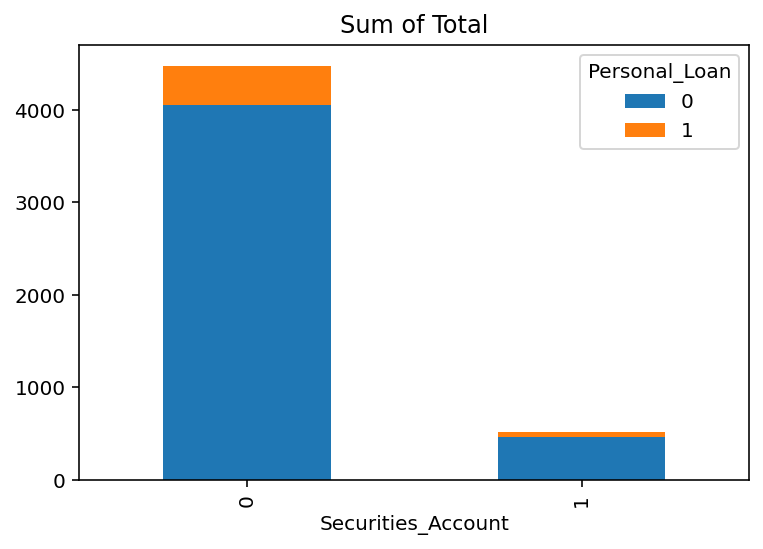

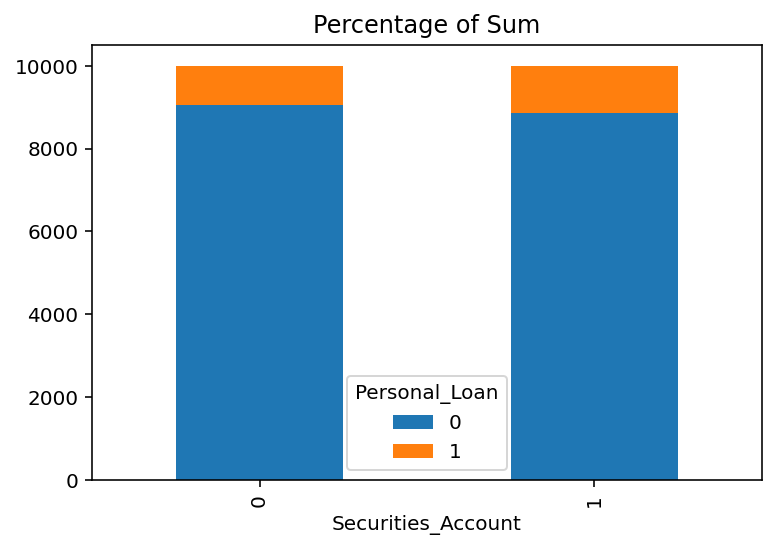

In [94]:
di=pd.crosstab(df.Securities_Account,df.Personal_Loan)
di1 = di.div(di.sum(1),axis=0)*100*100
di.plot(kind="bar",stacked=True)
plt.title("Sum of Total")
di1.plot(kind="bar",stacked=True)
plt.title("Percentage of Sum")

### Inference

##### Having Securities_Account is not a factor
***

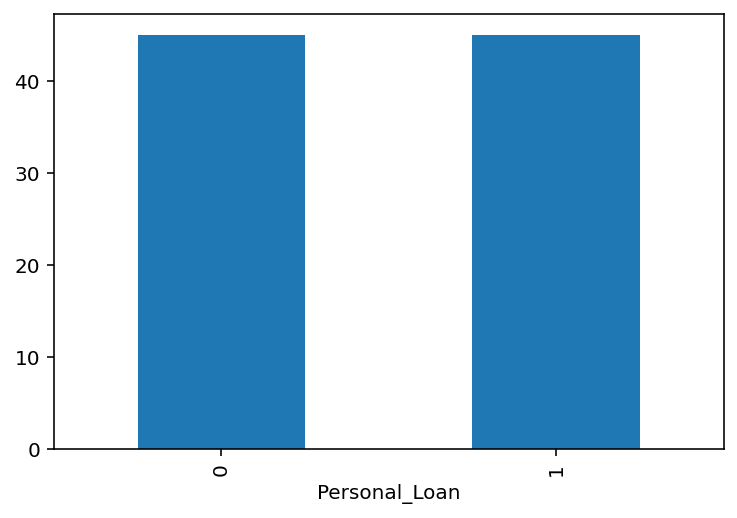

In [95]:
df.groupby("Personal_Loan")["Age"].median().plot.bar()

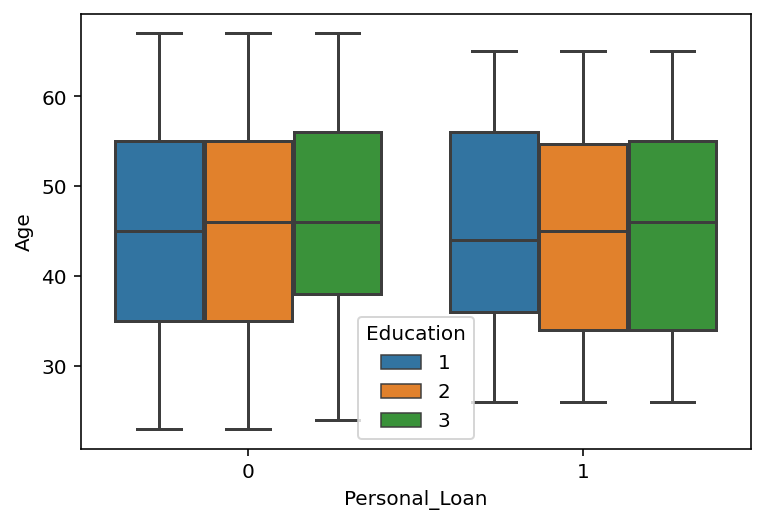

In [96]:
sns.boxplot(data=df,x="Personal_Loan",y="Age", hue="Education")

In [97]:
#Lets try grouping the ages

In [98]:
df.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [99]:
bins=[23,30,55,67]
group = ["Young","Adult","Old"]
df["Age_Group"] = pd.cut(df.Age,bins,labels=group)

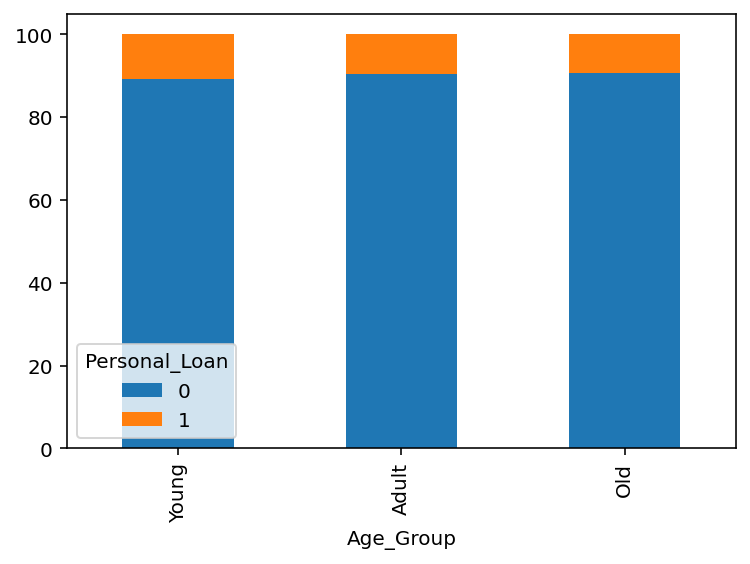

In [100]:
di=pd.crosstab(df.Age_Group,df.Personal_Loan,normalize="index")*100
di.plot(kind="bar",stacked=True)

### Inference

#####  Applicants Age does not influence the probablility of taking Personal Loans
***

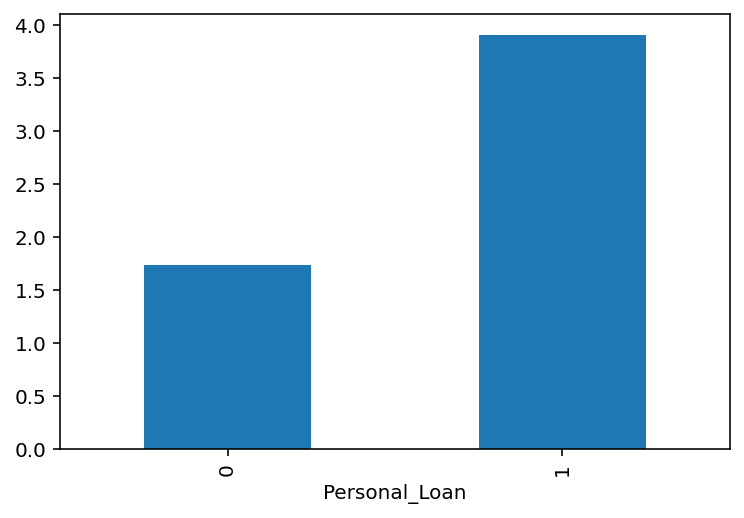

In [101]:
df.groupby("Personal_Loan")["CCAvg"].mean().plot(kind="bar")

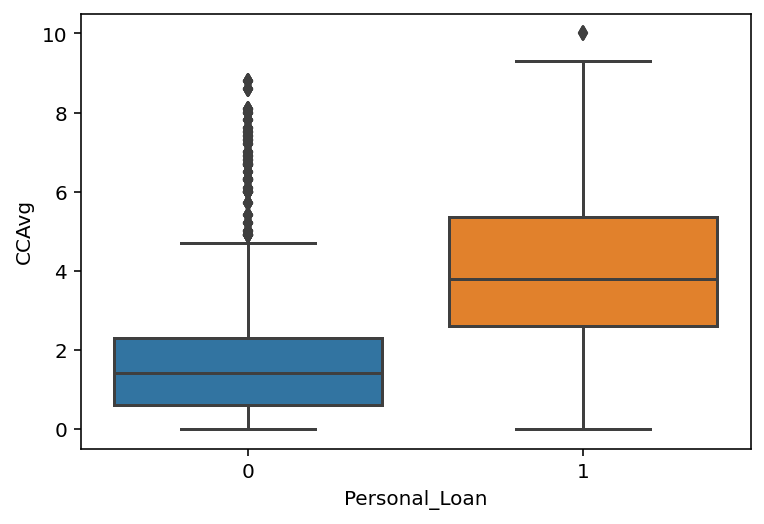

In [102]:
sns.boxplot(data=df,x="Personal_Loan",y="CCAvg")

In [103]:
#sns.swarmplot(data=df,x="Personal_Loan",y="CCAvg")

### Inference

##### Higher spending on Credit Card is most likely a credible factor in probability of applying for loan
***

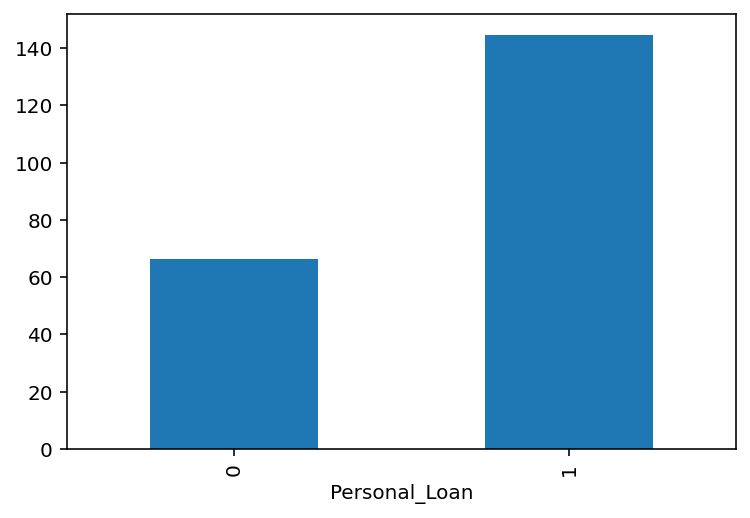

In [104]:
df.groupby("Personal_Loan")["Income"].mean().plot(kind="bar")

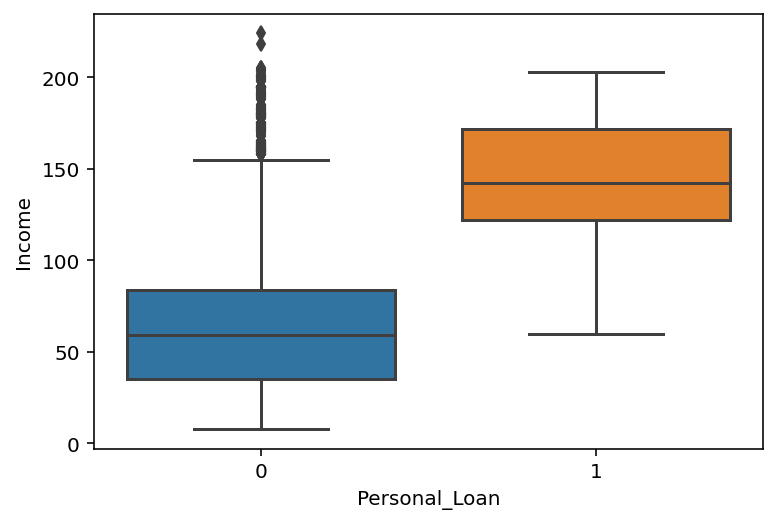

In [105]:
sns.boxplot(data=df,x="Personal_Loan",y="Income")

### Inference

##### Higher Income group people are most likely to apply for personal loan
***

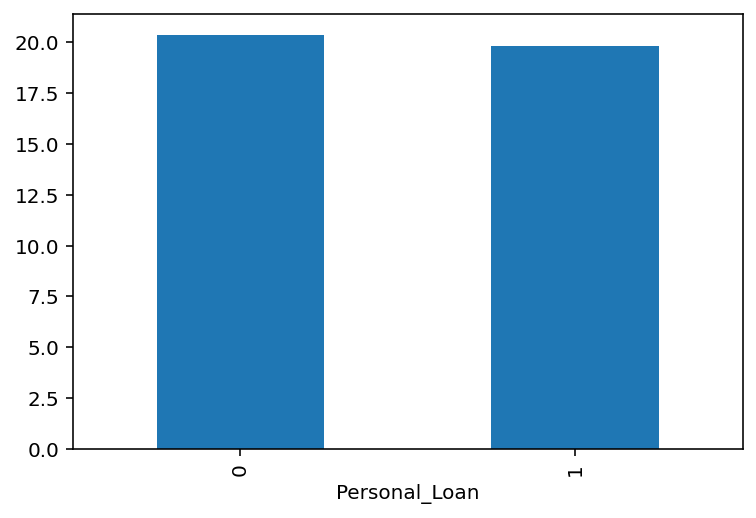

In [106]:
df.groupby("Personal_Loan")["Experience"].mean().plot(kind="bar")

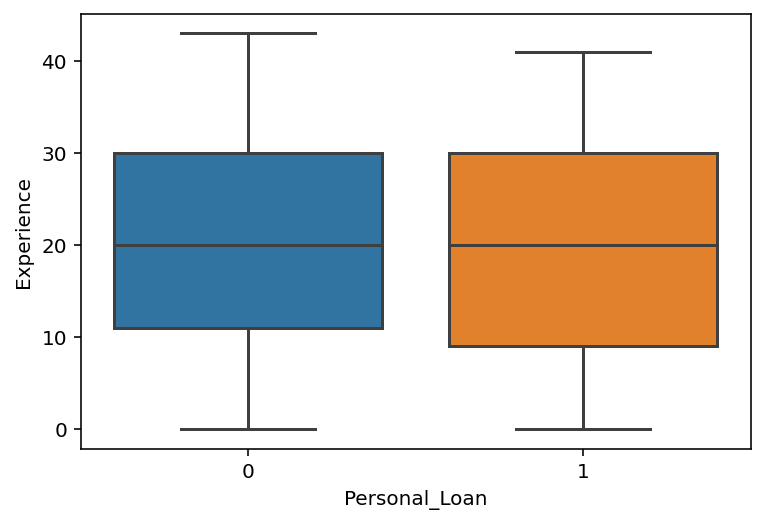

In [107]:
sns.boxplot(data=df,x="Personal_Loan",y="Experience")

### Inference

##### As expected, Experience does not influence probablility of Loan purchase. Just like Age since both are corelated
***

## Treating the outliers

##### Data on mortgage is highly sckewed. This needs to be treated.

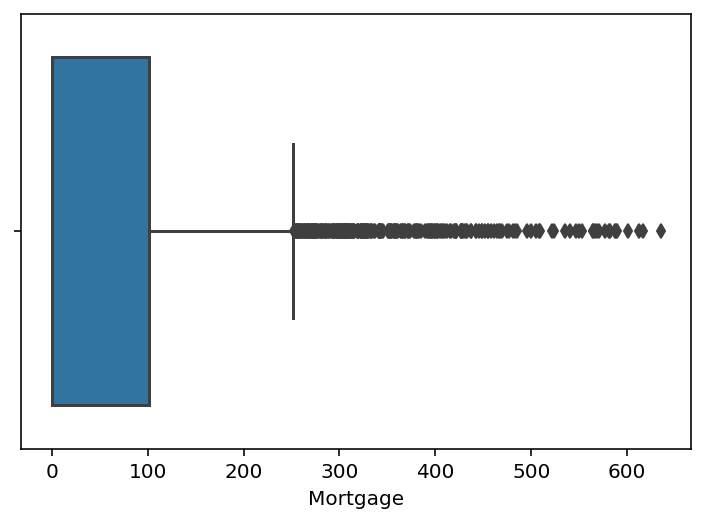

In [108]:
sns.boxplot(df.Mortgage)

In [109]:
from scipy import stats

df["Mort_z"]=np.abs(stats.zscore(df.Mortgage))

In [110]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard Age_Group    Mort_z  
0                   1           0       0           0     Young  0.555524  
1                   1           0       0           0     Adult  0.555524  
2                   0           0       0           0     Adult  0.555524  
3                   0           0       0           0     Adult  0.555524  
4                   0           0       0           1     Adult  0.555524

In [111]:
df.loc[df.Mort_z>3].count() ## count of outliers

Age                   105
Experience            105
Income                105
Family                105
CCAvg                 105
Education             105
Mortgage              105
Personal_Loan         105
Securities_Account    105
CD_Account            105
Online                105
CreditCard            105
Age_Group             105
Mort_z                105
dtype: int64

In [112]:
### There are 105 rows with Z score >3

dfz=df[df.Mort_z<3] ## Taking out the outliers...

In [113]:
dfz.shape

(4895, 14)

In [114]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4895 non-null   int64   
 1   Experience          4895 non-null   int64   
 2   Income              4895 non-null   int64   
 3   Family              4895 non-null   int64   
 4   CCAvg               4895 non-null   float64 
 5   Education           4895 non-null   int64   
 6   Mortgage            4895 non-null   int64   
 7   Personal_Loan       4895 non-null   int64   
 8   Securities_Account  4895 non-null   int64   
 9   CD_Account          4895 non-null   int64   
 10  Online              4895 non-null   int64   
 11  CreditCard          4895 non-null   int64   
 12  Age_Group           4883 non-null   category
 13  Mort_z              4895 non-null   float64 
dtypes: category(1), float64(2), int64(11)
memory usage: 540.3 KB


In [115]:
#df["Education"] = df["Education"].astype("category")
#df["Personal_Loan"] = df["Personal_Loan"].astype("category")
#df["Securities_Account"] = df["Securities_Account"].astype("category")
#df["CD_Account"] = df["CD_Account"].astype("category")
#df["Online"] = df["Online"].astype("category")

In [116]:
dfz.drop(["Mort_z","Age_Group"], axis=1,inplace=True)

In [117]:
dfz.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

***

## Building the Model for Logistic Regression - Phase 1

In [118]:
X = dfz.drop(["Personal_Loan"], axis=1)
#X = df.drop(["Personal_Loan","Mort_z", "Age_Group"], axis=1).astype("float64")

In [119]:
y=dfz[["Personal_Loan"]]

In [120]:
X.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [121]:
y

Personal_Loan
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
4995              0
4996              0
4997              0
4998              0
4999              0

[4895 rows x 1 columns]

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [123]:
X_train.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

***
## Regression with StatsModel

In [124]:
import statsmodels.api as sm

In [125]:
lgt = sm.Logit(y_train, sm.add_constant(X_train))

In [126]:
lg=lgt.fit()

Optimization terminated successfully.
         Current function value: 0.122082
         Iterations 9


### StatsModel - Metrics

In [127]:
from scipy import stats

In [128]:
stats.chisqprob = lambda chisq, df: stats.shi2.sf(chisq,df)

In [129]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3426
Model:                          Logit   Df Residuals:                     3414
Method:                           MLE   Df Model:                           11
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                  0.5934
Time:                        10:37:17   Log-Likelihood:                -418.25
converged:                       True   LL-Null:                       -1028.7
Covariance Type:            nonrobust   LLR p-value:                4.844e-255
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.3340      1.370    -11.197      0.000     -18.018     -12.650
Age                    0.0709      0.044      1.610      0.107      -0.015       0.157
Experience            -0.0672      0.045     -1.510      0.131      -0.155       0.020
Income                 0.0571      0.003     17.142      0.000       0.051       0.064
Family                 0.6490      0.094      6.916      0.000       0.465       0.833
CCAvg                  0.0924      0.050      1.853      0.064      -0.005       0.190
Education              1.7057      0.140     12.222      0.000       1.432       1.979
Mortgage               0.0010      0.001      1.163      0.245      -0.001       0.003
Securities_Account    -0.9246      0.357     -2.589      0.010      -1.625      -0.225
CD_Account             3.6608      0.391      9.373      0.000       2.895       4.426
Online                -0.5858      0.194     -3.022      0.003      -0.966      -0.206
CreditCard            -0.9482      0.255     -3.717      0.000      -1.448      -0.448
======================================================================================
"""

In [130]:
lgcoef = pd.DataFrame(lg.params, columns=["coef"])

In [131]:
lgcoef.loc[:,"Odds_ration"] = np.exp(lgcoef.coef)

In [132]:
lgcoef['probability'] = lgcoef['Odds_ration']/(1+lgcoef['Odds_ration'])

In [133]:
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [134]:
lgcoef = lgcoef.sort_values(by="Odds_ration", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

coef  Odds_ration  probability  pval
CD_Account           3.66        38.89         0.97  0.00
Education            1.71         5.51         0.85  0.00
Family               0.65         1.91         0.66  0.00
CCAvg                0.09         1.10         0.52  0.06
Income               0.06         1.06         0.51  0.00
Online              -0.59         0.56         0.36  0.00
Securities_Account  -0.92         0.40         0.28  0.01
CreditCard          -0.95         0.39         0.28  0.00
const              -15.33         0.00         0.00  0.00

In [135]:
lg.pred_table()

array([[3076.,   45.],
       [ 115.,  190.]])

## Fitting the Logistic Regression - SKLEARN

In [136]:
from sklearn.linear_model import LogisticRegression

lgm = LogisticRegression()

In [137]:
lgm.fit(X_train, y_train)

LogisticRegression()

In [138]:
### It appears there is no convergence achieved with the current preprocessing.

In [139]:
y_pred = lgm.predict(X_test)

### Metrics

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.81      0.55      0.65       128

    accuracy                           0.95      1469
   macro avg       0.89      0.77      0.81      1469
weighted avg       0.95      0.95      0.95      1469



In [142]:
accuracy_score(y_test,y_pred)

0.9496255956432947

In [143]:
lgm.score(X_test,y_test)

0.9496255956432947

In [144]:
lgm.score(X_train,y_train)

0.9474605954465849

In [145]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1325,   16],
       [  58,   70]], dtype=int64)

Text(0.5, 15.0, 'Predict')

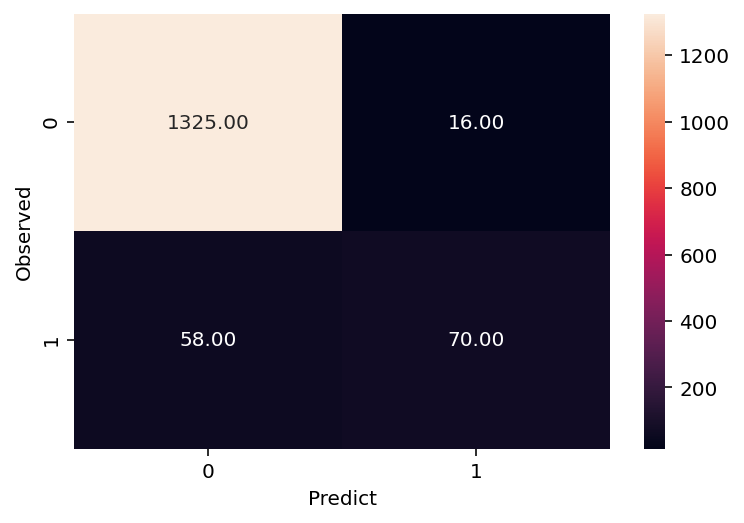

In [146]:
sns.heatmap(cm,annot=True, fmt=".2f", xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predict")

In [147]:
roc_auc_score(y_test,y_pred)

0.767471802759135

In [148]:
y_pred_proba = lgm.predict_proba(X_test)[:,1]
y_pred_proba

array([0.02440872, 0.00528362, 0.00026924, ..., 0.04659338, 0.03135715,
       0.02541041])

In [149]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

In [150]:
auc(fpr,tpr)

0.9429763236390754

In [151]:
roc_auc_score(y_test,y_pred)

0.767471802759135

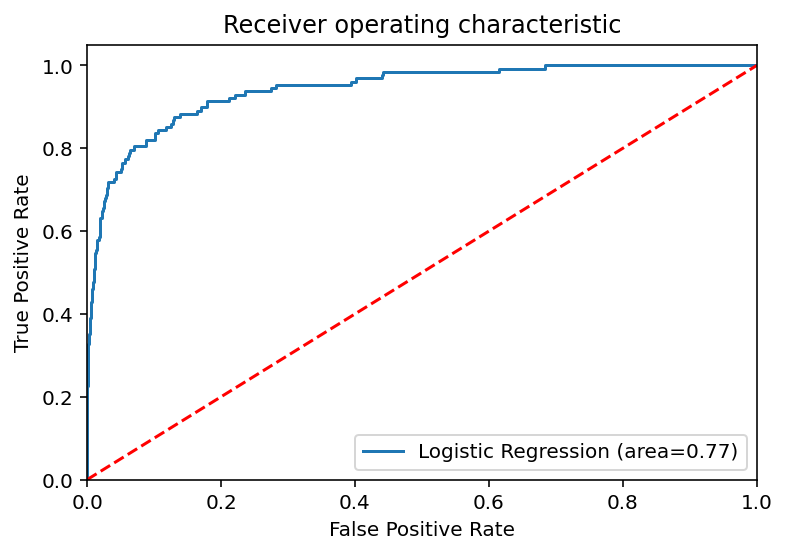

In [152]:
plt.plot(fpr,tpr, label="Logistic Regression (area={:.2f})".format(roc_auc_score(y_test,y_pred)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Inference

#### The accuracy is 94.96% but we know from the the data that ratio of loan to no-loan is very small. Hence accuracy is not a true measure of performance.
#### The null-hypotesis in this case is No-LoanApplication. We should reduce Type II error.
#### The Type II error False negative is 58 and recall of 1 is 55%
#### AUC is 94.3% which is good and ROC_AUC is about 76.74%

***

## Parameter Optimization

In [153]:
lgm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [154]:
#l2 with all solvers

In [155]:
solver=['newton-cg','lbfgs','liblinear','sag','saga']
df_sol=pd.DataFrame(index=["train_sc","test_sc"],columns=solver)
for i in solver:
    m = LogisticRegression(random_state=42,penalty="l2", C=0.75, solver=i)
    m.fit(X_train, y_train)
    y_pred_t = m.predict(X_test)
    
    
    df_sol.loc["train_sc",i]=(m.score(X_train, y_train))
    df_sol.loc["test_sc",i]=(m.score(X_test, y_test))

In [156]:
df_sol

newton-cg lbfgs liblinear  sag saga
train_sc      0.95  0.94      0.95 0.91 0.91
test_sc       0.95  0.93      0.95 0.90 0.90

In [157]:
#l1 with only 'liblinear' and 'saga'

In [158]:
solver=['liblinear','saga']
df_sol=pd.DataFrame(index=["train_sc","test_sc"],columns=solver)
for i in solver:
    m = LogisticRegression(random_state=42,penalty="l1", C=0.75, solver=i)
    m.fit(X_train, y_train)
    y_pred_t = m.predict(X_test)
    
    
    df_sol.loc["train_sc",i]=(m.score(X_train, y_train))
    df_sol.loc["test_sc",i]=(m.score(X_test, y_test))

In [159]:
df_sol

liblinear saga
train_sc      0.95 0.91
test_sc       0.95 0.90

### Inference:
##### Highest accuracy is given by "newton-cg" on both train and test ==> choosing newton-cg
***

In [160]:
df_sol_1=pd.DataFrame(index=["train_sc","test_sc"],columns=["newton-cg"])
m = LogisticRegression(random_state=42,penalty="l2", C=0.75, solver="newton-cg",class_weight="balanced")
m.fit(X_train,y_train)
df_sol_1.loc["train_sc",:]=(m.score(X_train, y_train))
df_sol_1.loc["test_sc",:]=(m.score(X_test, y_test))

In [161]:
df_sol_1

newton-cg
train_sc      0.90
test_sc       0.90

In [162]:
df_sol_2=pd.DataFrame(index=["train_sc","test_sc"],columns=["liblinear"])
m = LogisticRegression(random_state=42,penalty="l1", C=0.75, solver="liblinear",class_weight="balanced")
m.fit(X_train,y_train)
df_sol_2.loc["train_sc",:]=(m.score(X_train, y_train))
df_sol_2.loc["test_sc",:]=(m.score(X_test, y_test))

In [163]:
df_sol_2

liblinear
train_sc      0.90
test_sc       0.90

### Inference:
##### Adding Class_weight made things worse. Will set to default.
***

In [164]:
C=[0.01,.1,.25,.5,.75,1]
df_sol_2=pd.DataFrame(index=["train_sc","test_sc"],columns=C)
for i in C:
    m = LogisticRegression(random_state=42,penalty="l2", C=i, solver="newton-cg")
    m.fit(X_train, y_train)
    y_pred_t = m.predict(X_test)
    
    
    df_sol_2.loc["train_sc",i]=(m.score(X_train, y_train))
    df_sol_2.loc["test_sc",i]=(m.score(X_test, y_test))

In [165]:
df_sol_2

0.01 0.10 0.25 0.50 0.75 1.00
train_sc 0.94 0.95 0.95 0.95 0.95 0.95
test_sc  0.94 0.95 0.95 0.95 0.95 0.95

### Inference:
##### Leave C=0.5 at default value
***

## Final Model

In [166]:
model = LogisticRegression(random_state=42,penalty="l2", C=0.5, solver="newton-cg")
model.fit(X_train, y_train)
y_pred_t = model.predict(X_test)

In [167]:
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.80      0.59      0.68       128

    accuracy                           0.95      1469
   macro avg       0.88      0.79      0.82      1469
weighted avg       0.95      0.95      0.95      1469



In [168]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1325,   16],
       [  58,   70]], dtype=int64)

Text(0.5, 15.0, 'Predict')

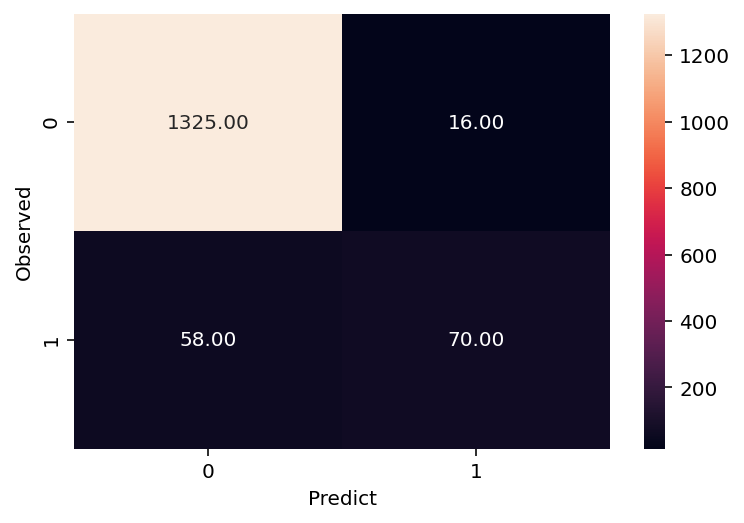

In [169]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt=".2f", xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predict")

In [170]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

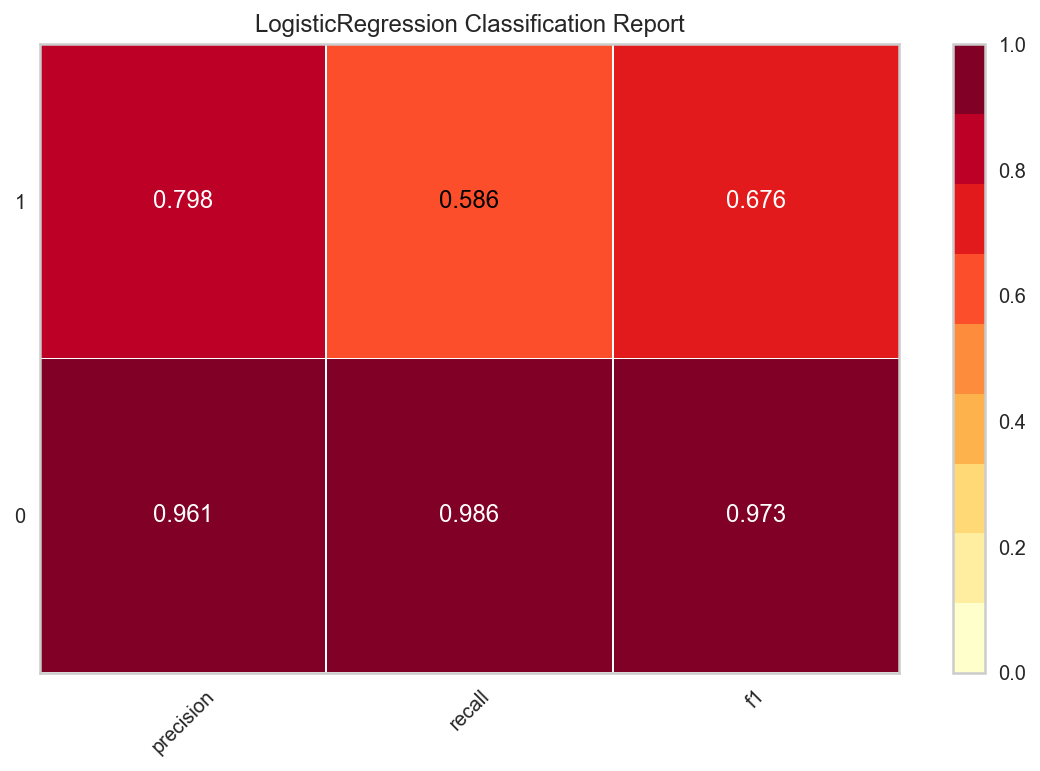

In [171]:
v = ClassificationReport(model)
v.fit(X_train,y_train)
v.score(X_test, y_test)
v.show()

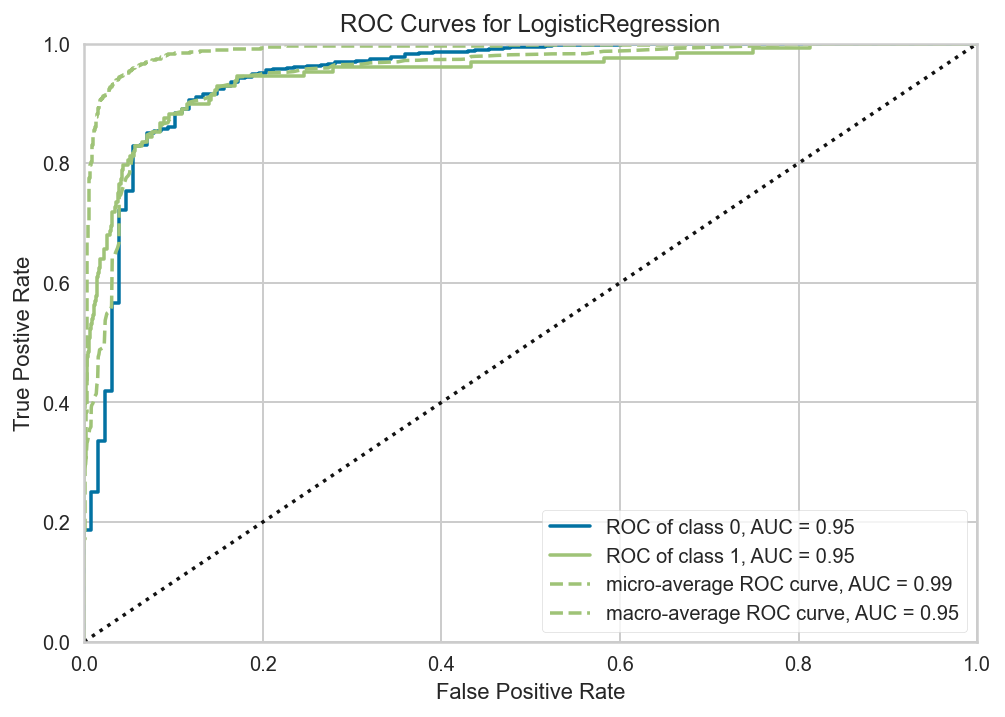

In [172]:
roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Scaling the X and Y to reduce Type II error - Phase 2

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [174]:
cl_names = dfz.columns
cl_names

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [175]:
X_train = scaler.fit_transform(X_train)

In [176]:
X_test = scaler.fit_transform(X_test)

In [177]:
lgm.fit(X_train, y_train)

LogisticRegression()

In [178]:
y_pred = lgm.predict(X_test)

### Metrics

In [179]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, f1_score, recall_score, precision_score

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.81      0.59      0.68       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469



In [181]:
accuracy_score(y_test,y_pred)

0.9523485364193329

In [182]:
lgm.score(X_test,y_test)

0.9523485364193329

In [183]:
lgm.score(X_train,y_train)

0.9530064214827787

In [184]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1323,   18],
       [  52,   76]], dtype=int64)

Text(0.5, 29.5, 'Predict')

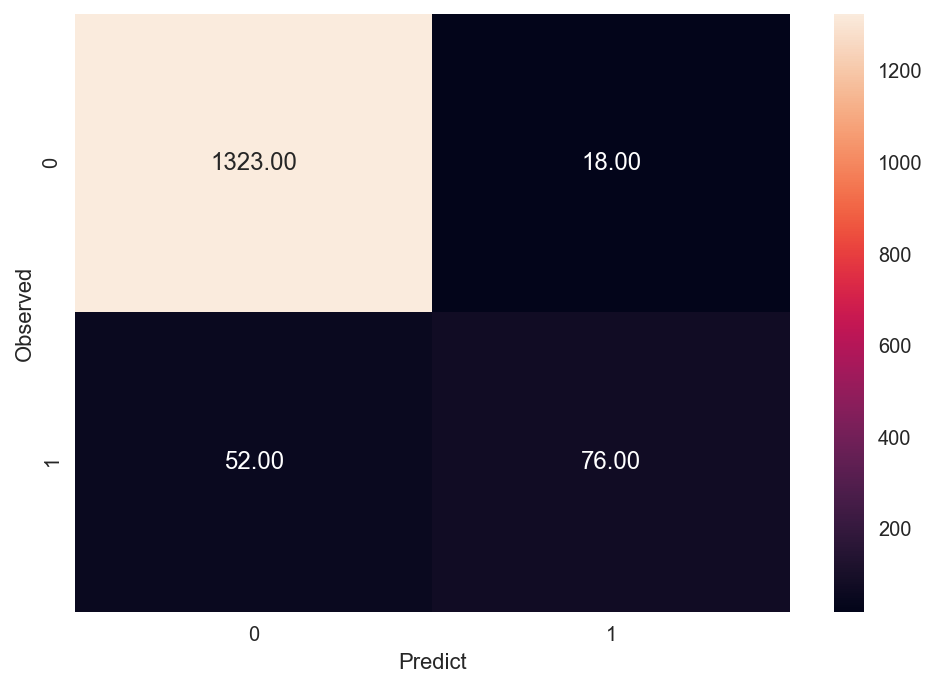

In [185]:
sns.heatmap(cm,annot=True, fmt=".2f", xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predict")

In [186]:
roc_auc_score(y_test,y_pred)

0.7901635906040269

In [187]:
y_pred_proba = lgm.predict_proba(X_test)[:,1]
y_pred_proba

array([0.01441412, 0.00175728, 0.00072965, ..., 0.1320544 , 0.03213906,
       0.02784919])

In [188]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

In [189]:
auc(fpr,tpr)

0.9494488721103653

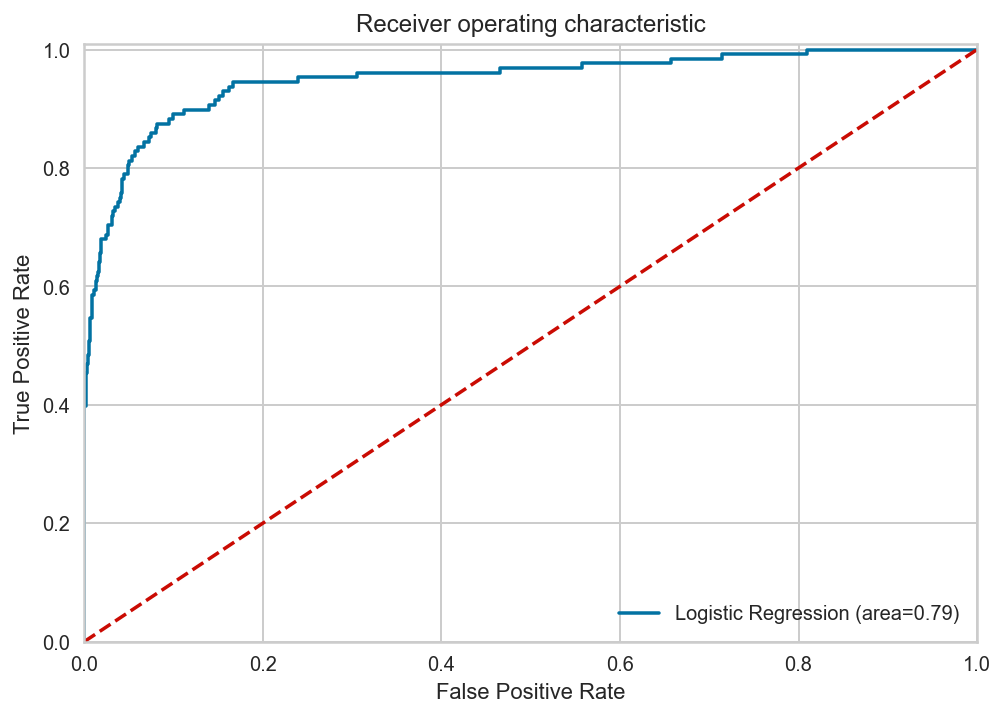

In [190]:
plt.plot(fpr,tpr, label="Logistic Regression (area={:.2f})".format(roc_auc_score(y_test,y_pred)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Parameter Optimization

In [191]:
lgm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [192]:
#l2 with all solvers

In [193]:
solver=['newton-cg','lbfgs','liblinear','sag','saga']
df_sol=pd.DataFrame(index=["train_sc","test_sc"],columns=solver)
for i in solver:
    m = LogisticRegression(random_state=42,penalty="l2", C=0.75, solver=i)
    m.fit(X_train, y_train)
    y_pred_t = m.predict(X_test)
    
    
    df_sol.loc["train_sc",i]=(m.score(X_train, y_train))
    df_sol.loc["test_sc",i]=(m.score(X_test, y_test))

In [194]:
df_sol

newton-cg lbfgs liblinear  sag saga
train_sc      0.95  0.95      0.95 0.95 0.95
test_sc       0.95  0.95      0.95 0.95 0.95

In [195]:
#l1 with only 'liblinear' and 'saga'

In [196]:
solver=['liblinear','saga']
df_sol=pd.DataFrame(index=["train_sc","test_sc"],columns=solver)
for i in solver:
    m = LogisticRegression(random_state=42,penalty="l1", C=0.75, solver=i)
    m.fit(X_train, y_train)
    y_pred_t = m.predict(X_test)
    
    
    df_sol.loc["train_sc",i]=(m.score(X_train, y_train))
    df_sol.loc["test_sc",i]=(m.score(X_test, y_test))

In [197]:
df_sol

liblinear saga
train_sc      0.95 0.95
test_sc       0.95 0.95

### Inference:
##### Highest accuracy is given by "newton-cg" and liblinear ==> choosing newton-cg
***

In [198]:
df_sol_1=pd.DataFrame(index=["train_sc","test_sc"],columns=["newton-cg"])
m = LogisticRegression(random_state=42,penalty="l2", C=0.75, solver="newton-cg",class_weight="balanced")
m.fit(X_train,y_train)
df_sol_1.loc["train_sc",:]=(m.score(X_train, y_train))
df_sol_1.loc["test_sc",:]=(m.score(X_test, y_test))

In [199]:
df_sol_1

newton-cg
train_sc      0.90
test_sc       0.90

### Inference:
##### No imporvement by adding Balanced. In fact it became worse.
***

In [200]:
C=[0.01,.1,.25,.5,.75,1]
df_sol_2=pd.DataFrame(index=["train_sc","test_sc"],columns=C)
for i in C:
    m = LogisticRegression(random_state=42,penalty="l2", C=i, solver="newton-cg")
    m.fit(X_train, y_train)
    y_pred_t = m.predict(X_test)
    
    
    df_sol_2.loc["train_sc",i]=(m.score(X_train, y_train))
    df_sol_2.loc["test_sc",i]=(m.score(X_test, y_test))

In [201]:
df_sol_2

0.01 0.10 0.25 0.50 0.75 1.00
train_sc 0.94 0.95 0.95 0.95 0.95 0.95
test_sc  0.94 0.95 0.95 0.95 0.95 0.95

### Inference:
##### Leave C=0.5 at default value
***

## Final Model

In [202]:
model = LogisticRegression(random_state=42,penalty="l2", C=0.5, solver="newton-cg")
model.fit(X_train, y_train)
y_pred_t = model.predict(X_test)

In [203]:
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.83      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469



In [204]:
cms=confusion_matrix(y_test,y_pred)
cms

array([[1323,   18],
       [  52,   76]], dtype=int64)

Text(0.5, 29.5, 'Predict')

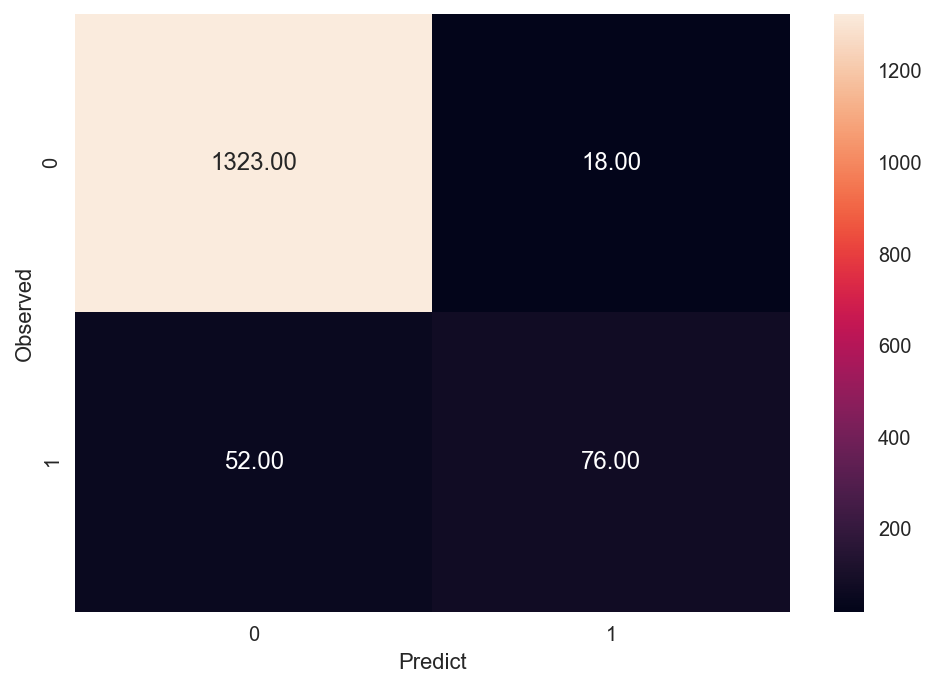

In [205]:
sns.heatmap(cms,annot=True, fmt=".2f", xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predict")

In [206]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

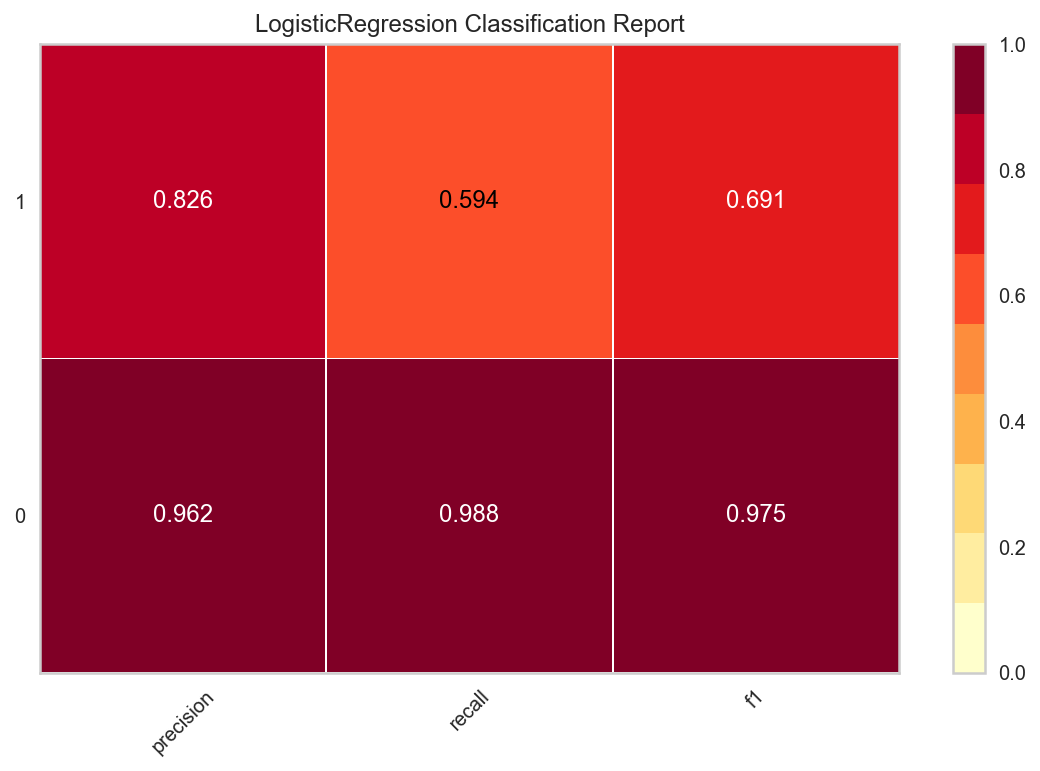

In [207]:
vs = ClassificationReport(model)
vs.fit(X_train,y_train)
vs.score(X_test, y_test)
vs.show()

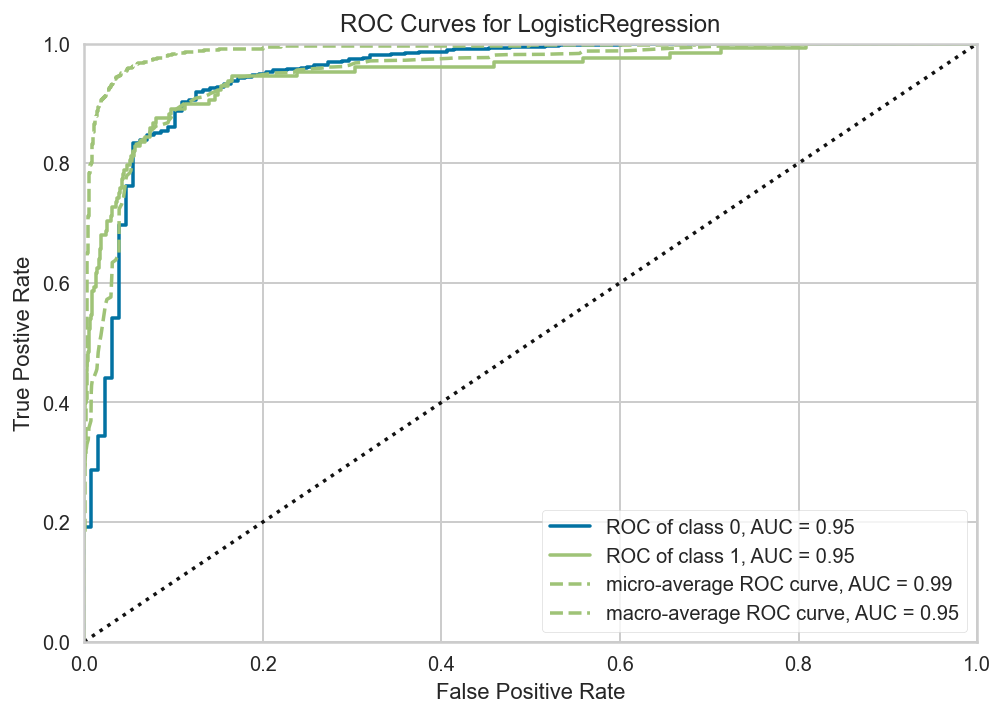

In [208]:
rocs = ROCAUC(model)
rocs.fit(X_train, y_train)
rocs.score(X_test, y_test)
rocs.show()

### Inference

##### By performing StandardScalar, the Recall improved slightly and so did ROC_AUC
##### Type 2 error dropped to 52 from 58.

## Changing Threshold to mininimize type 2 error and improve recall

### Depending on the business case, to minimize the Type 2 error we can reduce the threshold from default value of 0.5

### Here an attempt is made to break-even recall and precision to arrive at a resonable value of threshold

In [209]:
t = 0
dfr=pd.DataFrame(index=range(0,1001),columns=["Threshold","Recall","Precision", "f1-score"])
for i in range(0,1001):
    y_pred_th = ((model.predict_proba(X_test)[:, 1])>= t).astype(int)
    dfr.iloc[i,1]=recall_score(y_test, y_pred_th)
    dfr.iloc[i,2]=precision_score(y_test, y_pred_th)
    dfr.iloc[i,3]=f1_score(y_test, y_pred_th)
    dfr.iloc[i,0]=t
    t=t+0.001

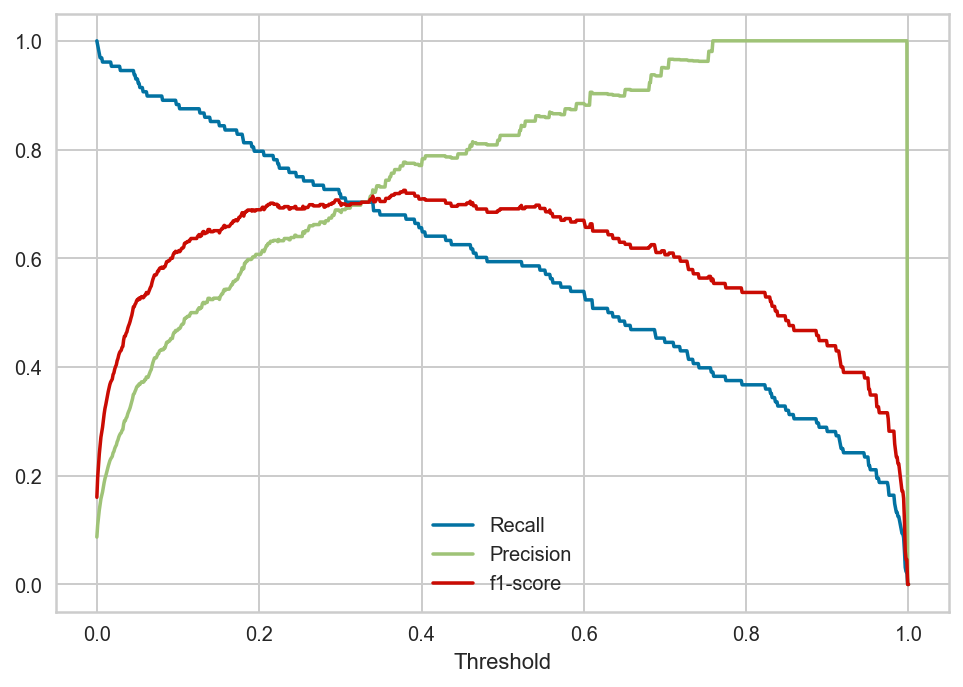

In [210]:
dfr.set_index("Threshold").plot()

In [211]:
dfr[(dfr.Recall==dfr.Precision) & (dfr.Threshold<1.0)]

Threshold Recall Precision f1-score
326      0.33   0.70      0.70     0.70
327      0.33   0.70      0.70     0.70
328      0.33   0.70      0.70     0.70
329      0.33   0.70      0.70     0.70
330      0.33   0.70      0.70     0.70
331      0.33   0.70      0.70     0.70
332      0.33   0.70      0.70     0.70
333      0.33   0.70      0.70     0.70
334      0.33   0.70      0.70     0.70
335      0.34   0.70      0.70     0.70
999      1.00   0.00      0.00     0.00

In [212]:
dfr

Threshold Recall Precision f1-score
0            0   1.00      0.09     0.16
1         0.00   0.99      0.11     0.20
2         0.00   0.98      0.12     0.22
3         0.00   0.98      0.14     0.24
4         0.00   0.97      0.15     0.25
...        ...    ...       ...      ...
996       1.00   0.03      1.00     0.06
997       1.00   0.02      1.00     0.05
998       1.00   0.02      1.00     0.05
999       1.00   0.00      0.00     0.00
1000      1.00   0.00      0.00     0.00

[1001 rows x 4 columns]

#### Based on the graph above, the Recall and Precision break even at a threshold =0.33

In [213]:
threshold = 0.33 #based on above inference
y_pred_th = ((model.predict_proba(X_test)[:, 1])>= threshold).astype(int)
y_pred_th.shape

(1469,)

In [214]:
print('Valuation for test data only:')
print(classification_report(y_test, model.predict(X_test)))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_test, y_pred_th))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.83      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1341
           1       0.70      0.70      0.70       128

    accuracy                           0.95      1469
   macro avg       0.84      0.84      0.84      1469
weighted avg       0.95      0.95      0.95      1469



Text(0.5, 1.0, 'Threshold = 0.33')

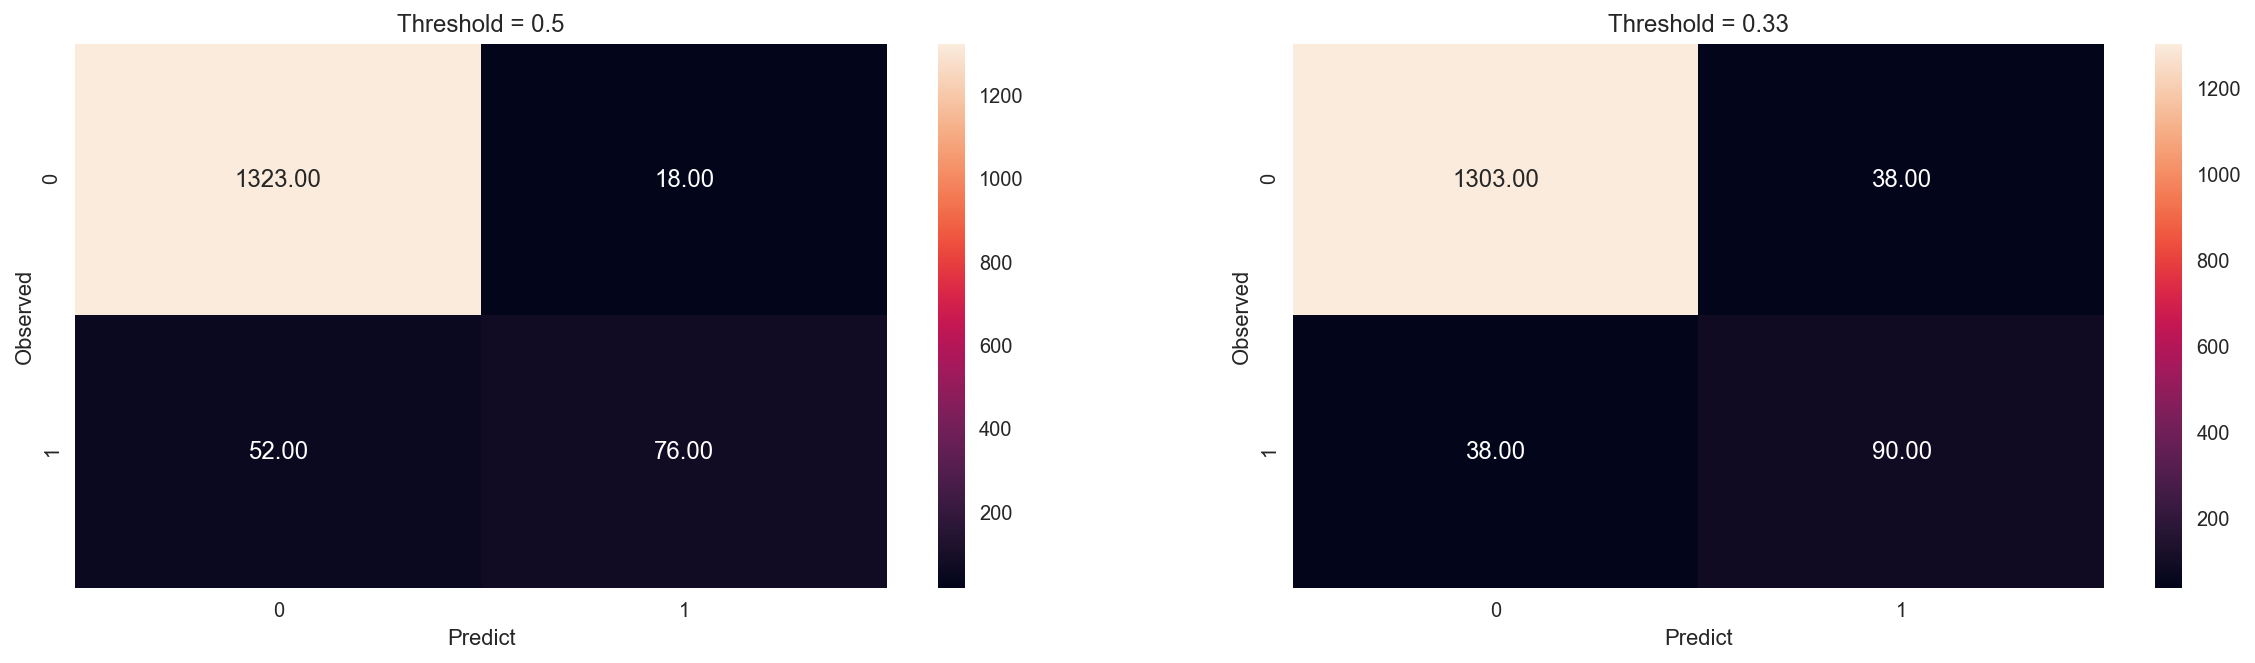

In [215]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.heatmap(cms,annot=True, fmt=".2f", xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predict")
plt.title("Threshold = 0.5")
plt.subplot(122)
cms_t = confusion_matrix(y_test,y_pred_th)
sns.heatmap(cms_t,annot=True, fmt=".2f", xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predict")
plt.title("Threshold = {}".format(threshold))

In [216]:
y_pred_th = ((model.predict_proba(X_test)[:, 1])>= threshold).astype(int)
print ("Recall =",recall_score(y_test, y_pred_th)*100,"%")
print ("Precision =",precision_score(y_test, y_pred_th)*100,"%")
print ("f1_score =",f1_score(y_test, y_pred_th)*100,"%")

Recall = 70.3125 %
Precision = 70.3125 %
f1_score = 70.3125 %


### Testing the Model on Train Dataset

In [217]:
y_pred_th = ((model.predict_proba(X_train)[:, 1])>= threshold).astype(int)
print ("Recall =",recall_score(y_train, y_pred_th)*100,"%")
print ("Precision =",precision_score(y_train, y_pred_th)*100,"%")
print ("f1_score =",f1_score(y_train, y_pred_th)*100,"%")

Recall = 70.16393442622952 %
Precision = 71.57190635451505 %
f1_score = 70.86092715231787 %


Text(0.5, 1.0, 'Threshold = 0.33')

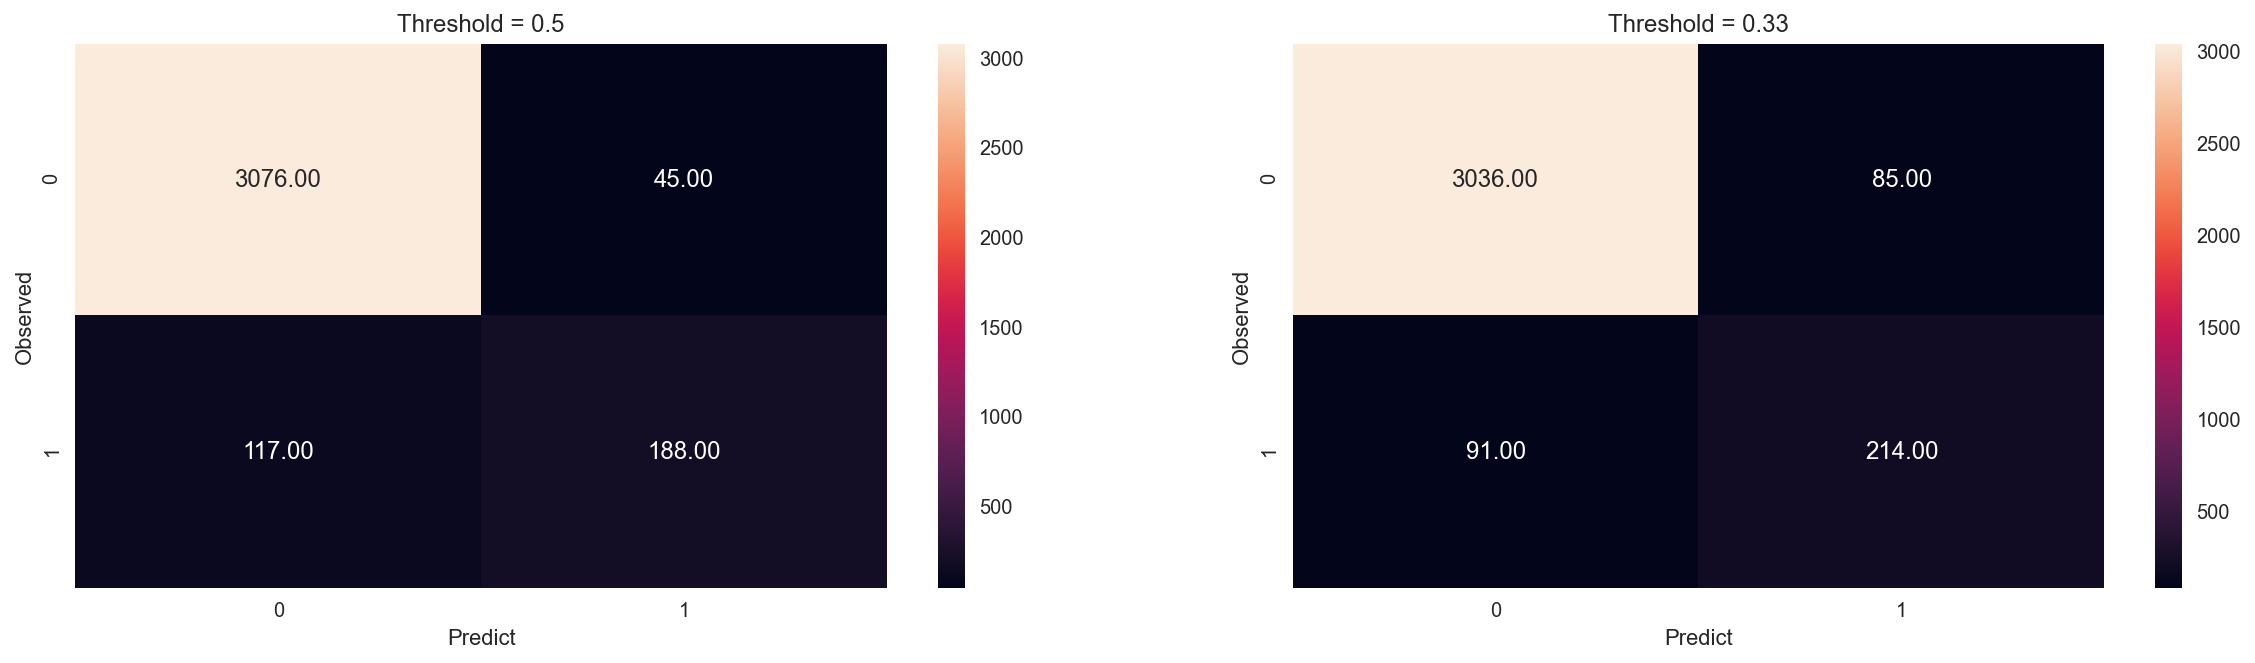

In [218]:
plt.figure(figsize=(20,5))
plt.subplot(121)
y_pred_tr = model.predict(X_train)
cms_tr = confusion_matrix(y_train,y_pred_tr)
sns.heatmap(cms_tr,annot=True, fmt=".2f", xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predict")
plt.title("Threshold = 0.5")
plt.subplot(122)
cms_t = confusion_matrix(y_train,y_pred_th)
sns.heatmap(cms_t,annot=True, fmt=".2f", xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel("Observed")
plt.xlabel("Predict")
plt.title("Threshold = {}".format(threshold))

## Business Inference based on Test Data
### The model can predict with 70.3% recall and 70.3% precision and at threshold of 0.33 striking a good balance between Type 1 and Type 2 errors.
### The False Negatives that reperent missed opportunities are thus lowered to first 52 from 58 by using StandardScalar and then to 38 with threshold set to 0.33. 

### Depending on the the company's Key Performance Indices, the tolerance level on type 2 errors can be managed by tweaking the threshold.

##### Note: Perhaps there are better Classification Algorithms for higher accuracy and also using boosters can help improve the model.

***